<a href="https://colab.research.google.com/github/pratikghodke777/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

---



---



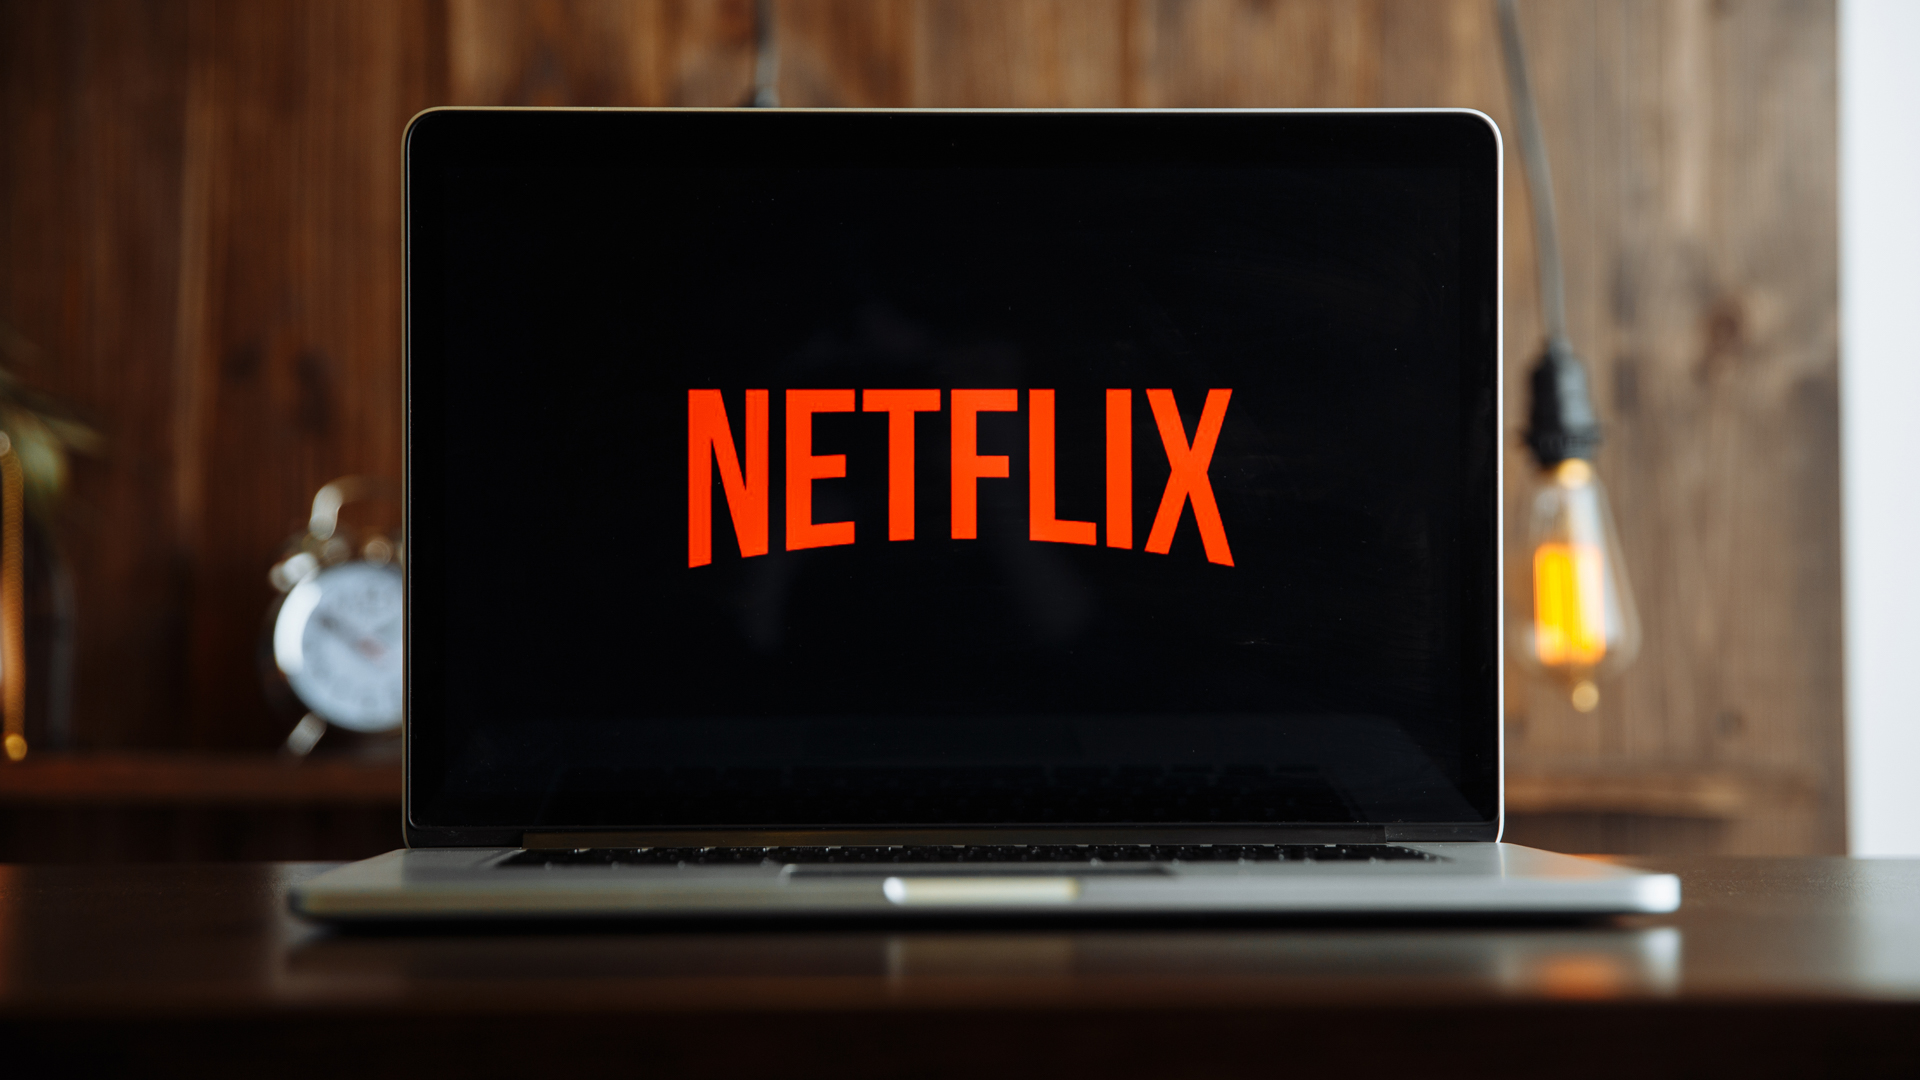

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>

---



---


1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

---



---



1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description



---





---



# **Import libraries.**

---



---



In [1]:

# Importing necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas.util.testing as tm
%matplotlib inline
import seaborn as sns
import math
import scipy.stats as stat
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import cm
from math import log10
#necessary imports for plotly and map
import os
import re
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.subplots import make_subplots
import re, string, unicodedata
import nltk
import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from keras.preprocessing.text import Tokenizer

from sklearn import preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
#word cloud imports
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  """


**IMPORTING THE DATASET'S**

---







In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
NETFLIX_DF=pd.read_csv('/content/drive/MyDrive/Capston projects/NETFLIX MOVIES AND TV SHOWS CLUSTERING/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

**Netflix Data -Exploration**

---



In [4]:
# top 5 rows
NETFLIX_DF.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [5]:
# Bottom 5 rows
NETFLIX_DF.tail()

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef Fares   
7783   s7784    Movie                                   Zubaan  Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan          NaN   
7785   s7786  TV Show                    Zumbo's Just Desserts          NaN   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                                NaN   

                                                country          date_added  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

**Shape of our Netflix dataset**


---



In [6]:
NETFLIX_DF.shape

(7787, 12)

In [7]:
NETFLIX_DF.columns    # Coloumns in data set

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
NETFLIX_DF.info()   # summary of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [9]:
NETFLIX_DF.describe()   #basic statistical information


release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000

In [10]:
NETFLIX_DF.nunique()  #Unique values

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

Overview of Netflix data set

---



---
1. I data set 7787 rows and 12 columns.
2.Need to clean the data set


---




# **1.EDA - Exploratory Data Analysis**

---



---



## **A) Dealing with Duplicate Values**

---



In [11]:
NETFLIX_DF.duplicated().sum()   #Count duplicate values

0

No Duplicate values are present in data set

## **B)Null Values**

---



In [12]:
NETFLIX_DF.isnull().sum()        # Count of null


show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [13]:
for i in NETFLIX_DF.columns:
    null_rate = NETFLIX_DF[i].isna().sum() / len(NETFLIX_DF) * 100 
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

director null rate: 30.68%
cast null rate: 9.22%
country null rate: 6.51%
date_added null rate: 0.13%
rating null rate: 0.09%


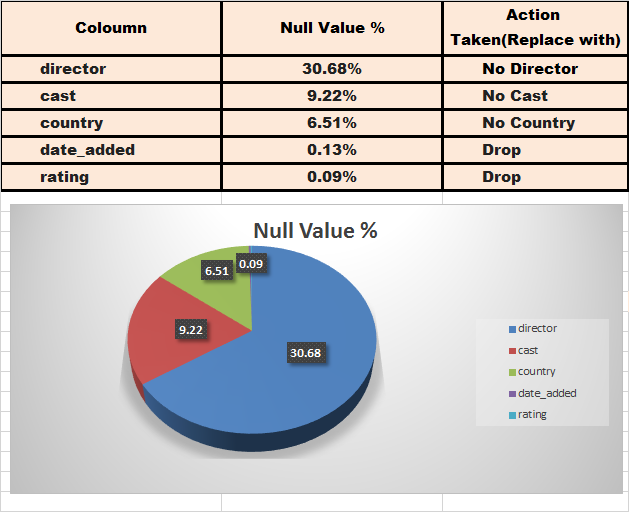

In [14]:
NETFLIX_DF['country'] = NETFLIX_DF['country'].fillna('No Country')
NETFLIX_DF['director'] = NETFLIX_DF['director'].fillna('No Director')
NETFLIX_DF['cast'] = NETFLIX_DF['cast'].fillna('No Cast')
NETFLIX_DF.dropna(subset=['date_added','rating'],inplace=True)

In [15]:
NETFLIX_DF.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [16]:
# Create new features to store date, day, month and year seperately.
NETFLIX_DF["date_added"] = pd.to_datetime(NETFLIX_DF['date_added'])  # First convert date_added to date time format.
NETFLIX_DF['day_added'] = NETFLIX_DF['date_added'].dt.day            # Compute day.
NETFLIX_DF['year_added'] = NETFLIX_DF['date_added'].dt.year          # Compute year.
NETFLIX_DF['month_added'] = NETFLIX_DF['date_added'].dt.month        # Compute month.

# **C)Data Visualisations**

---



**1) Content Type On Netflix**

---



In [17]:
olors = ['	#db0000', '	#564d4d']
labels = ['Tv Show', 'Movie']
tv_show = NETFLIX_DF.type.value_counts()[1]
movie = NETFLIX_DF.type.value_counts()[0]

fig = go.Figure(data=[go.Pie(labels=labels, values=[tv_show, movie], hole=.6)])
fig.update_layout(
    title_text="Type of content watched on Netflix",title_x=0.5, legend=dict(x=0.9),height=500, width=500,
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Type of content.', font_size=20, showarrow=False)])




**Movies are clearly more popular on Netflix than TV showS**

---



**2.Content growth over years**

---



In [18]:
# Plot growth of the contents over the years.
tv_show = NETFLIX_DF[NETFLIX_DF["type"] == "TV Show"]
movie = NETFLIX_DF[NETFLIX_DF["type"] == "Movie"]

col = "year_added"

content_1 = tv_show[col].value_counts().reset_index()
content_1 = content_1.rename(columns = {col : "count", "index" : col})
content_1 = content_1.sort_values(col)

content_2 = movie[col].value_counts().reset_index()
content_2 = content_2.rename(columns = {col : "count", "index" : col})
content_2 = content_2.sort_values(col)

trace1 = go.Scatter(x=content_1[col], y=content_1["count"], name="TV Shows", marker=dict(color="#db0000"))
trace2 = go.Scatter(x=content_2[col], y=content_2["count"], name="Movies", marker=dict(color="#564d4d"))

data = [trace1, trace2]
layout = go.Layout(title="Content added over the years",title_x=0.15, legend=dict(x=0.4, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

      I.The highest number of movies and tv shows got added in 2019 and 2020
      II.Growth in the number of movies on Netflix is much higher than tv shows

### **3.Top 5 Genres for Movies/Shows on Netflix**

---



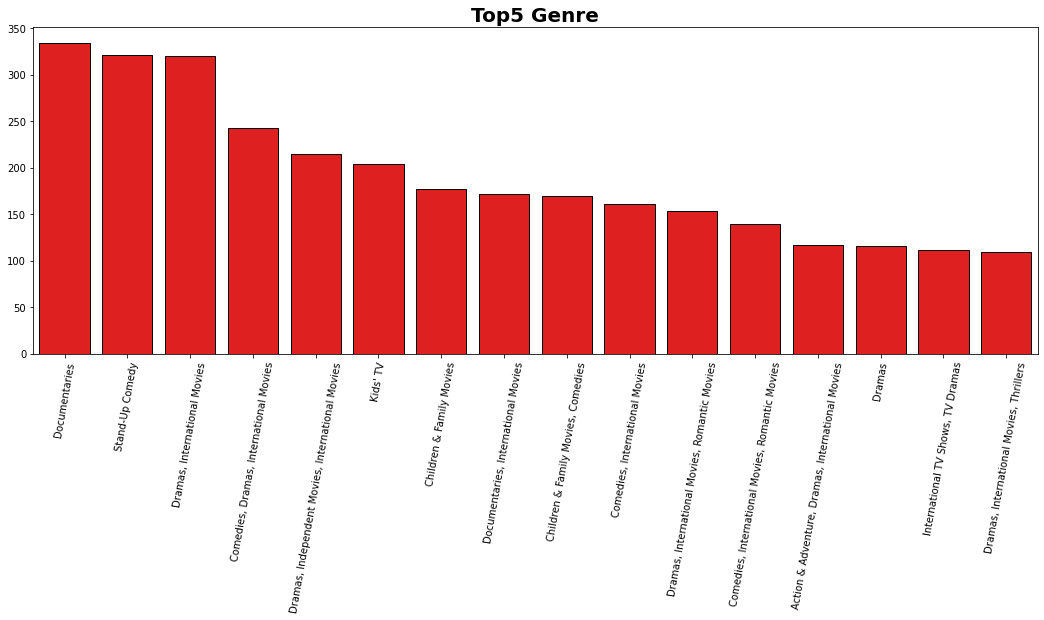

In [19]:
# Top 5 Genre 
plt.figure(figsize=(18,6))
plt.style.use("default")
sns.barplot(x = NETFLIX_DF["listed_in"].value_counts().head(16).index,
            y = NETFLIX_DF["listed_in"].value_counts().head(16).values,palette=["red"],edgecolor = "Black")
plt.xticks(rotation=80)
plt.title("Top5 Genre",size='20',fontweight="bold")
plt.show()

**4.Top ten countries that produce most of the content**

---



In [20]:
country_df=NETFLIX_DF['country'].value_counts().reset_index()
country_df.rename(columns={'index': 'Country_Name'}, inplace=True)
country_df.rename(columns={'Country': 'Count'}, inplace=True)


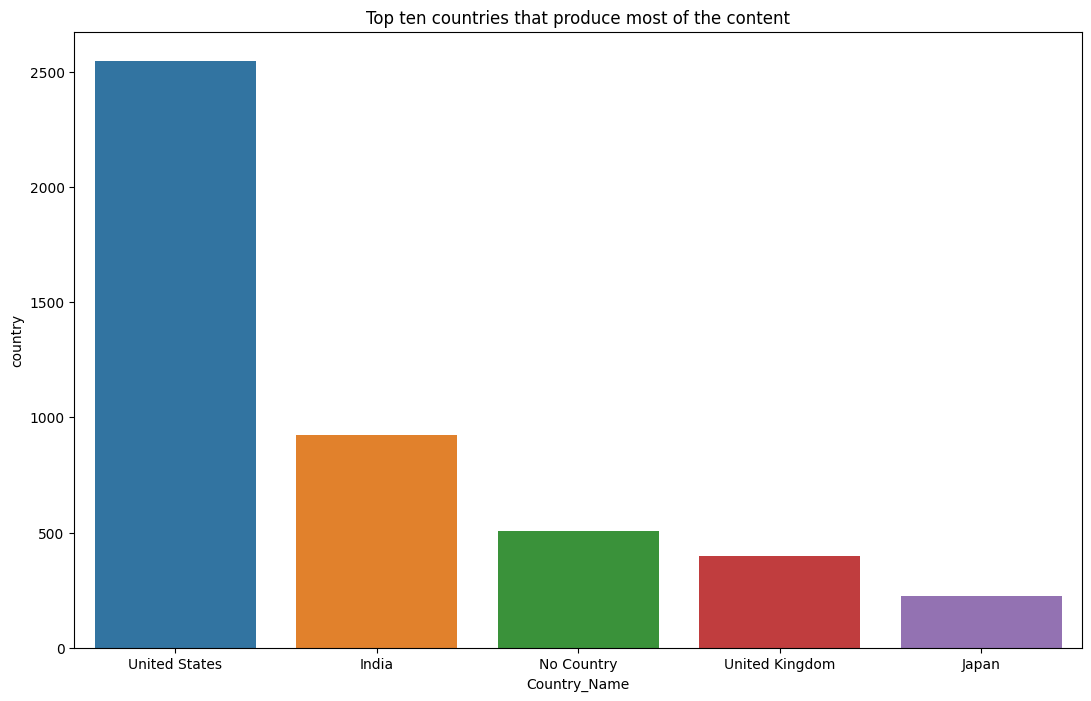

In [21]:
plt.figure(figsize=(13,8))
plt.title('Top ten countries that produce most of the content')
sns.barplot(x='Country_Name',y='country',data=country_df.head())


**5.We saw before in which year most of the content was added, but what about the year it released.**

---



In [22]:
# Put the data into bins.
release_yr_bin = pd.cut(NETFLIX_DF.release_year, [1924, 1999, 2010, 2021])
release_yr_bin.value_counts()
release_yr_bin = pd.DataFrame(release_yr_bin.value_counts()).reset_index()
release_yr_bin.rename(columns={'index':'year_interval', 'release_year':'count'}, inplace=True)
release_yr_bin['year_interval'] = release_yr_bin['year_interval'].astype('string')
release_yr_bin

year_interval  count
0  (2010, 2021]   6425
1  (1999, 2010]    896
2  (1924, 1999]    449

In [23]:
# Plot it.
fig = px.pie(release_yr_bin, values='count', names='year_interval', color_discrete_sequence=px.colors.sequential.RdBu, title='Most content released.',height=500, width=500)
fig.show()
 

**6.Actore cast in movies/shows**

---



In [24]:
# Create a list of all the actors in the data.
def data2list(data):
  actor_list = {}  # dict to store the count for each actor.
  temp_list = []   # list to store all the names.
  cast_list = list(data['cast'])  # define the data we intend to use.
  for i in range(len(cast_list)):
    temp_list.extend(str(cast_list[i]).split(','))
  for i in temp_list:
    if i not in actor_list:
      actor_list[i] = temp_list.count(i)
  return actor_list

In [25]:
# Create dataframe for list of actors.
actor_list = pd.DataFrame([data2list(NETFLIX_DF)]).T.reset_index()
actor_list = actor_list.sort_values(0, ascending=False).drop(106)  # dropped the nan values in the dataframe which was present at 106th index.

In [26]:
actor_list.head(10)

index   0
1294        Anupam Kher  38
194    Takahiro Sakurai  28
2203            Om Puri  27
4039     Shah Rukh Khan  27
740         Boman Irani  25
2506       Paresh Rawal  24
8462      Andrea Libman  24
4368          Yuki Kaji  23
4994       Vincent Tong  22
2201       Akshay Kumar  22

In [27]:
# Plot it.
top_10_actors = actor_list.head(10)
top_10_actors.rename(columns={'index':'Actors name', 0:'Count'}, inplace=True)

fig = px.bar(top_10_actors, x='Actors name', y='Count', text_auto=True,
             color='Count', color_continuous_scale=['#564d4d', '#db0000'])

fig.update_traces(textangle=0, cliponaxis=False)
fig.update_layout(
    title={
        'text': 'Actors with most content on platform.',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        autosize=False,
        width=1200,
        height=500)
fig.show()

**7.What kind of content is available in different countries in recent years?**

---



In [28]:
NETFLIX_DF['country'].fillna('United States', inplace=True)
NETFLIX_DF['country_single'] = NETFLIX_DF['country'].apply(lambda x: x.split(",")[0])
country_order = NETFLIX_DF['country_single'].value_counts()[:10].index
countryVScontent = NETFLIX_DF[['type', 'country_single']].groupby('country_single')['type'].value_counts().unstack().loc[country_order].reset_index()
countryVScontent

type           index   Movie  TV Show
0      United States  2097.0    777.0
1              India   883.0     73.0
2     United Kingdom   341.0    235.0
3         No Country   229.0    276.0
4             Canada   175.0     84.0
5              Japan    75.0    160.0
6             France   137.0     59.0
7        South Korea    42.0    152.0
8              Spain   119.0     49.0
9             Mexico    79.0     44.0

In [29]:
# Plot the above data.
fig = go.Figure()
fig.add_trace(go.Bar(
    y=countryVScontent['index'],
    x=countryVScontent['Movie'],
    name='Movies',
    orientation='h',
    marker=dict(
        color='rgba(219, 0, 0, 1)'
    )
))
fig.add_trace(go.Bar(
    y=countryVScontent['index'],
    x=countryVScontent['TV Show'],
    name='TV Show',
    orientation='h',
    marker=dict(
        color='rgba(86, 77, 77, 1)'
    )
))

fig.update_layout(barmode='stack',
                   title={'text': 'Top ten countries and the content they provide.',
                          'y':0.89,
                          'x':0.5,
                          'font_size':25,
                          'xanchor': 'center',
                          'yanchor': 'top'}
                  )
fig.show()

I.The United States is a leading producer of both types of content; this makes sense since Netflix is a US company.

II.The influence of Bollywood in India explains the type of content available, and perhaps the main focus of this industry is Movies and not TV Shows.


---



**8.Netflix Movie Duration Distribution**

---



In [30]:
NETFLIX_DF['duration']=NETFLIX_DF['duration'].str.replace('Season','')
NETFLIX_DF['duration']=NETFLIX_DF['duration'].str.replace('s','')
NETFLIX_DF['duration']=NETFLIX_DF['duration'].str.replace('min','')

NETFLIX_DF['duration']=NETFLIX_DF['duration'].astype(str).astype(int)
NETFLIX_DF['duration']

0         4
1        93
2        78
3        80
4       123
       ... 
7782     99
7783    111
7784     44
7785      1
7786     90
Name: duration, Length: 7770, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



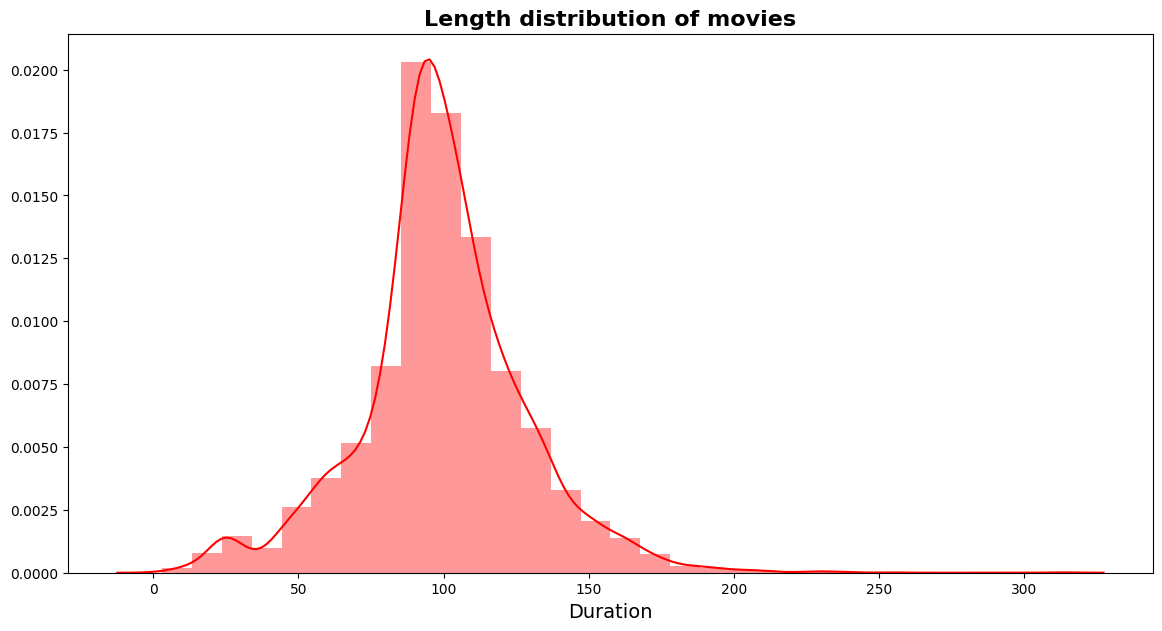

In [31]:
# Length distribution of movies
movie_df = NETFLIX_DF[NETFLIX_DF['type']=='Movie']

plt.figure(figsize=(14, 7))
plt.style.use("default")
sns.distplot(movie_df['duration'], bins=30,color='red',kde_kws={"color":"Red"}).set(ylabel=None)

plt.title('Length distribution of movies', fontsize=16,fontweight="bold")
plt.xlabel('Duration', fontsize=14)
plt.show()

**Most of the movies last for 90 to 120 minutes.**

**9.Country VS Type**

---



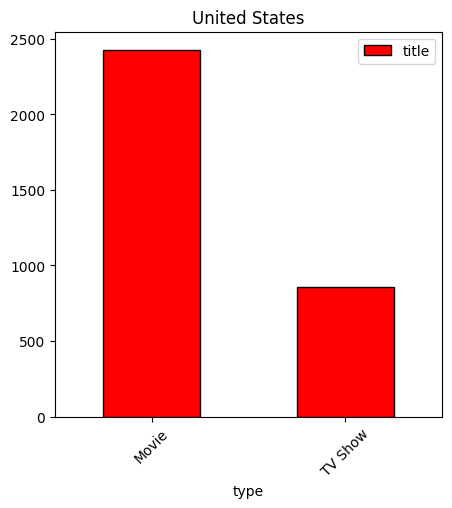

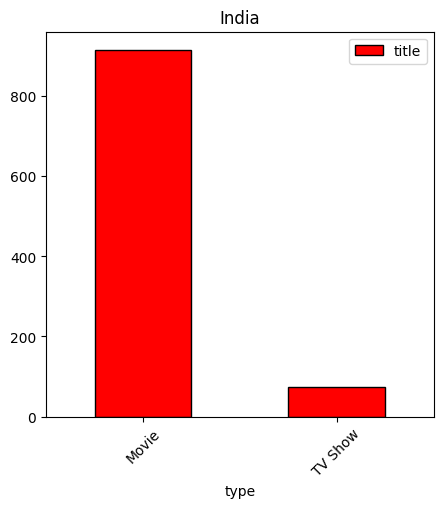

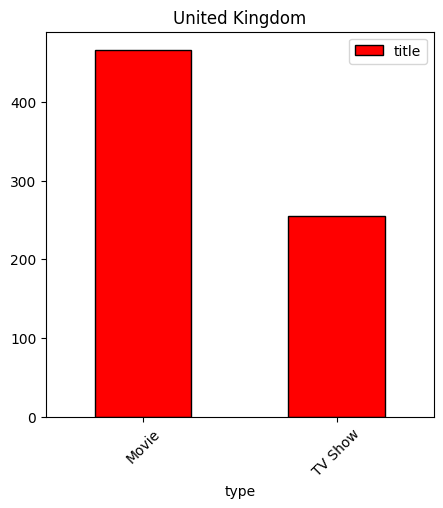

In [32]:
#get all country type preference
def get_country_type_trends(df):
  def explode_country(country):
    try:
        return country.split(", ")
    except:
        return ""
  df['country_list'] = df.apply(lambda x: explode_country(x['country']),axis=1)
  df = df.explode('country_list')
  grouped_df_ = df.groupby(['country_list','type']).agg({'title':'count'})
  grouped_df = grouped_df_.reset_index()
  grouped_df['country_list'].values
  grouped_df = grouped_df[grouped_df.country_list != '']
  rating_country_df = grouped_df.reset_index().drop("index", axis=1)
  list_of_countries = list(set(list(rating_country_df['country_list'].values)))
  for each in list_of_countries:
    if each in ['United States','India','United Kingdom']:
      plt.style.use('default')
      rating_country_df[rating_country_df['country_list'] == each].sort_values("title",ascending=False).plot.bar(x = "type", y="title", color="red", rot=45, figsize=(5,5),edgecolor='Black')
      plt.title(f"{each}")
      plt.grid(False)

get_country_type_trends(NETFLIX_DF)

**10.Summary of Content by Rating**

---



In [33]:
movies_rating = dict(movie['rating'].value_counts())
tv_shows_rating = dict(tv_show['rating'].value_counts())

In [34]:
# Plot the count of ratings for Tv shows and movies to understand them better.
fig = go.Figure()
fig.add_trace(go.Bar(x=list(tv_shows_rating.keys()),
                y=list(tv_shows_rating.values()),
                text=list(tv_shows_rating.values()),
                name='Tv-Shows',
                marker_color='rgb(219,0,0)'
                ))
fig.add_trace(go.Bar(x=list(movies_rating.keys()),
                y=list(movies_rating.values()),
                text=list(movies_rating.values()),
                name='Movies',
                marker_color='rgb(86,77,77)'
                ))

fig.update_layout(
    title='Ratings',title_x=0.47,
    xaxis_tickfont_size=15,
    yaxis=dict(
        title='Count',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=1,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.19,
    bargroupgap=0.2 
)
fig.show()

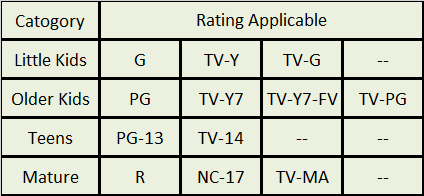

We can observed from above table what rating is applicable for which age group,
TV-MA that is Mature content is most feverate in netflix

---



**10.create a wordcloud to see which words appear the most in the titles for movies and tv shows**

---



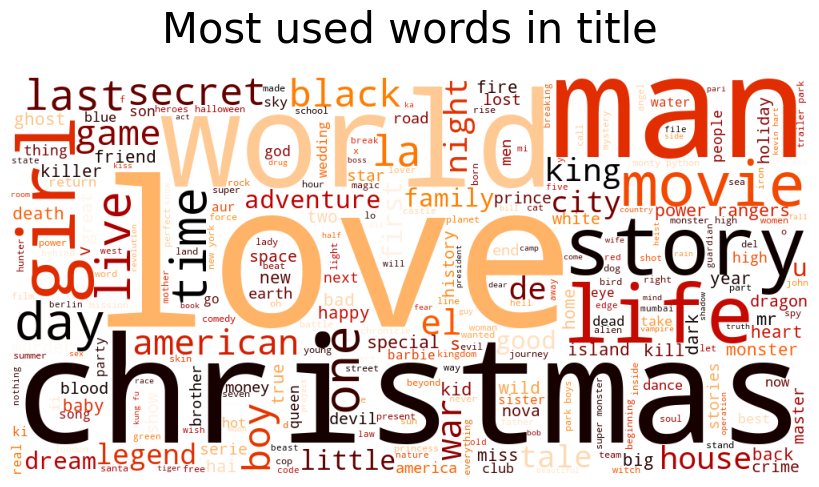

In [35]:
# Import the required libraries.
from wordcloud import WordCloud, STOPWORDS 

# Create a string to store all the words.
comment_words = ''

# Remove the stopwords.
stopwords = set(STOPWORDS)
 
# iterate through the column.
for val in NETFLIX_DF.title:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                colormap = 'gist_heat_r').generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.title('Most used words in title', fontsize = 30, pad=25)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# **Country VS Cast**

---



In [36]:
def convertListToString(s):
  return ' '.join([str(elem) for elem in s])

NETFLIX_DF['director']=NETFLIX_DF['director'].apply(lambda x:convertListToString(x))

In [37]:
#word cloud for user rating review
def func_select_Category(category_name,category_column,column_of_choice):
  df_word_cloud = NETFLIX_DF[[category_column,column_of_choice]].dropna()
  df_word_cloud = df_word_cloud[df_word_cloud[category_column]==category_name]
  text = " ".join(word for word in df_word_cloud[column_of_choice])
  # Create stopword list:
  stopwords = set(STOPWORDS)
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
  # Display the generated image:
  # the matplotlib way:
  plt.figure( figsize=(8,8), facecolor='white' )
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

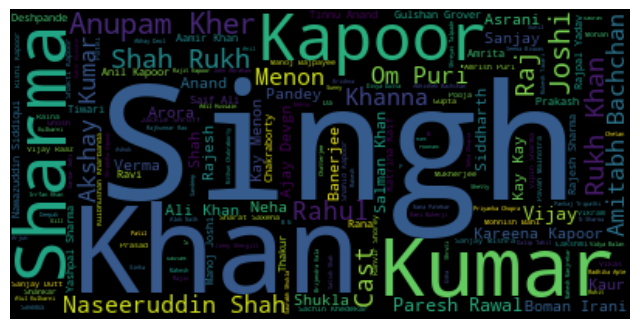

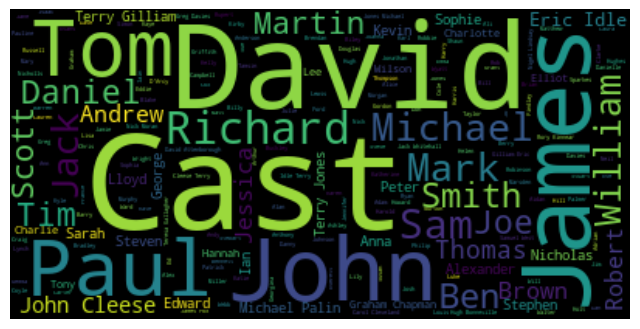

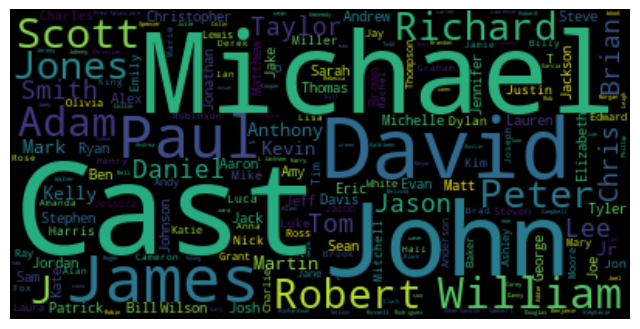

In [38]:
for i in ['India','United Kingdom','United States']:
  func_select_Category(i,'country','cast')

1.For India we can see Anurag Kashyab, Dhavid Dhawan, Gopal Varma, Dibakar Banerjee and many more.

2.For United Kingdom we can see Mathew, Adam, Michael, John and many more.

3.For US we can see David, Marcus, Scott, Adam, Johnson and many more.


---



# **Is Netflix has increasingly focusing on TV rather than movies in recent years.?**

---



---



In [39]:
#subsetting data for visualisation
d1 = NETFLIX_DF[NETFLIX_DF["type"] == "TV Show"]
d2 = NETFLIX_DF[NETFLIX_DF["type"] == "Movie"]

col = "release_year"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Scatter(
                    x=vc1[col], 
                    y=vc1["count"], 
                    name="TV Shows", 
                    marker=dict(color = 'rgb(249, 6, 6)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))

trace2 = go.Scatter(
                    x=vc2[col], 
                    y=vc2["count"], 
                    name="Movies", 
                    marker= dict(color = 'rgb(255, 255, 255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(hovermode= 'closest', title = 'Content added over the years' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Count'),template= "plotly_dark")
fig = go.Figure(data = [trace1, trace2], layout=layout)
fig.show(renderer='colab')

number of movies added to netflix is higher than that of TV shows. In 2018, netflix added 734 movies and 386 TV shows. So there we cannot conclude that netflix has switched focus from movies to TV shows.

---



# **Data Preprocessing**

**We will be using text columns to create clusters for our data.**

---



In [40]:
cluster_df = NETFLIX_DF[['title']]
cluster_df['cluster_data'] = (NETFLIX_DF['description'] + ' ' + NETFLIX_DF['listed_in'] + ' ' + NETFLIX_DF['director'] + ' ' + NETFLIX_DF['cast'] + ' ' + NETFLIX_DF['country'] + ' ' + NETFLIX_DF['rating']).astype(str)
cluster_df.set_index('title', inplace = True)
cluster_df.head()
cluster_df.head()

cluster_data
title                                                   
3%     In a future where the elite inhabit an island ...
7:19   After a devastating earthquake hits Mexico Cit...
23:59  When an army recruit is found dead, his fellow...
9      In a postapocalyptic world, rag-doll robots hi...
21     A brilliant group of students become card-coun...

In [41]:
# Remove punctuation from the text.
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string 
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
    
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(remove_punctuation)
cluster_df.head(2)

cluster_data
title                                                   
3%     In a future where the elite inhabit an island ...
7:19   After a devastating earthquake hits Mexico Cit...

In [42]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [43]:
stop_words = set(stopwords.words('english'))

In [44]:
# Remove the stopwords.
def stopwords(text):
    '''a function for removing the stopword'''
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    return " ".join(text)

cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(stopwords)
cluster_df.cluster_data.head(2)

title
3%      future elite inhabit island paradise far crowd...
7:19    devastating earthquake hits mexico city trappe...
Name: cluster_data, dtype: object

In [45]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [46]:
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(stemming)
cluster_df.head(2)

cluster_data
title                                                   
3%     futur elit inhabit island paradis far crowd sl...
7:19   devast earthquak hit mexico citi trap survivor...

In [ ]:
bag_of_words = cluster_df.cluster_data

# **Create Clusters:**

---



---



# ***1.KMEANS***

---



---



# **Silhoutte Score**

---



---



In [48]:
NETFLIX_DF['Length(listed_in)'] = NETFLIX_DF['listed_in'].apply(lambda x: len(x))
NETFLIX_DF.head()

show_id     type  title                           director  \
0      s1  TV Show     3%              N o   D i r e c t o r   
1      s2    Movie   7:19  J o r g e   M i c h e l   G r a u   
2      s3    Movie  23:59            G i l b e r t   C h a n   
3      s4    Movie      9              S h a n e   A c k e r   
4      s5    Movie     21        R o b e r t   L u k e t i c   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating  duration  \
0 2020-08-14          2020  TV-MA         4   
1 2016-12-23          2016  TV-MA        93   
2 2018-12-20          2011      R        78   
3 2017-11-16          2009  PG-13        80   
4 2020-01-01          2008  PG-13       123   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  day_added  year_added  \
0  In a future where the elite inhabit an island ...         14        2020   
1  After a devastating earthquake hits Mexico Cit...         23        2016   
2  When an army recruit is found dead, his fellow...         20        2018   
3  In a postapocalyptic world, rag-doll robots hi...         16        2017   
4  A brilliant group of students become card-coun...          1        2020   

   month_added country_single     country_list  Length(listed_in)  
0            8         Brazil         [Brazil]                 54  
1           12         Mexico         [Mexico]                 28  
2           12      Singapore      [Singapore]                 35  
3           11  United States  [United States]                 56  
4            1  United States  [United States]                  6

In [49]:
NETFLIX_DF.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'day_added', 'year_added', 'month_added', 'country_single',
       'country_list', 'Length(listed_in)'],
      dtype='object')

In [50]:
NETFLIX_DF['Length(description)'] = NETFLIX_DF['description'].apply(lambda x: len(x))

In [51]:
NETFLIX_DF[['description', 'Length(description)', 'listed_in' ,'Length(listed_in)']].head()

description  Length(description)  \
0  In a future where the elite inhabit an island ...                  136   
1  After a devastating earthquake hits Mexico Cit...                  148   
2  When an army recruit is found dead, his fellow...                  149   
3  In a postapocalyptic world, rag-doll robots hi...                  145   
4  A brilliant group of students become card-coun...                  143   

                                           listed_in  Length(listed_in)  
0  International TV Shows, TV Dramas, TV Sci-Fi &...                 54  
1                       Dramas, International Movies                 28  
2                Horror Movies, International Movies                 35  
3  Action & Adventure, Independent Movies, Sci-Fi...                 56  
4                                             Dramas                  6

In [52]:
X_features_rec = NETFLIX_DF[['Length(description)','Length(listed_in)']]
stdscaler = preprocessing.StandardScaler()
X_features_rec.describe()

Length(description)  Length(listed_in)
count          7770.000000        7770.000000
mean            143.101287          33.372458
std              10.618177          15.018409
min              61.000000           6.000000
25%             140.000000          23.000000
50%             146.000000          34.000000
75%             149.000000          47.000000
max             248.000000          79.000000

In [53]:
X_rescale=stdscaler.fit_transform(X_features_rec)
X=X_rescale
silhouette_score_ = [  ]
range_n_clusters = [i for i in range(2,16)]

In [54]:
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    silhouette_score_.append([int(n_clusters) , round(score , 2)])
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.39416413076348666
For n_clusters = 3, silhouette score is 0.43498587872384165
For n_clusters = 4, silhouette score is 0.4474707557436603
For n_clusters = 5, silhouette score is 0.4179451658408099
For n_clusters = 6, silhouette score is 0.42670886743010633
For n_clusters = 7, silhouette score is 0.43206528854562437
For n_clusters = 8, silhouette score is 0.4301963774923765
For n_clusters = 9, silhouette score is 0.3949109097748553
For n_clusters = 10, silhouette score is 0.3949818235709966
For n_clusters = 11, silhouette score is 0.3929419461659843
For n_clusters = 12, silhouette score is 0.39321716389111677
For n_clusters = 13, silhouette score is 0.39307971398725405
For n_clusters = 14, silhouette score is 0.3968343503494071
For n_clusters = 15, silhouette score is 0.39721666997456995


In [59]:
k_clusters = 45

In [60]:
#Clustering the dataset with the optimal number of clusters
model = KMeans(n_clusters=k_clusters, init='k-means++', n_init=10, max_iter=600, tol=0.000001, random_state=42)
model.fit(X)

KMeans(max_iter=600, n_clusters=45, random_state=42, tol=1e-06)

In [61]:
#Predict the clusters and evaluate the silhouette score
clusters = model.predict(X)
score = silhouette_score(X, clusters)
print("Silhouette score is {}".format(score))

Silhouette score is 0.36260722657400385


In [62]:
#Adding a seperate column for the clusters
NETFLIX_DF["Cluster Label"] = clusters
NETFLIX_DF.head()

show_id     type  title                           director  \
0      s1  TV Show     3%              N o   D i r e c t o r   
1      s2    Movie   7:19  J o r g e   M i c h e l   G r a u   
2      s3    Movie  23:59            G i l b e r t   C h a n   
3      s4    Movie      9              S h a n e   A c k e r   
4      s5    Movie     21        R o b e r t   L u k e t i c   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating  duration  \
0 2020-08-14          2020  TV-MA         4   
1 2016-12-23          2016  TV-MA        93   
2 2018-12-20          2011      R        78   
3 2017-11-16          2009  PG-13        80   
4 2020-01-01          2008  PG-13       123   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  day_added  year_added  \
0  In a future where the elite inhabit an island ...         14        2020   
1  After a devastating earthquake hits Mexico Cit...         23        2016   
2  When an army recruit is found dead, his fellow...         20        2018   
3  In a postapocalyptic world, rag-doll robots hi...         16        2017   
4  A brilliant group of students become card-coun...          1        2020   

   month_added country_single     country_list  Length(listed_in)  \
0            8         Brazil         [Brazil]                 54   
1           12         Mexico         [Mexico]                 28   
2           12      Singapore      [Singapore]                 35   
3           11  United States  [United States]                 56   
4            1  United States  [United States]                  6   

   Length(description)  Cluster Label  
0                  136             10  
1                  148              1  
2                  149              8  
3                  145             37  
4                  143             32

In [63]:
temp = pd.DataFrame(silhouette_score_ , columns = ["n clusters" , "silhouette score"])
temp = temp.sort_values( "silhouette score" , ascending = False )
temp.head(15)

n clusters  silhouette score
2            4              0.45
1            3              0.43
4            6              0.43
5            7              0.43
6            8              0.43
3            5              0.42
12          14              0.40
13          15              0.40
0            2              0.39
7            9              0.39
8           10              0.39
9           11              0.39
10          12              0.39
11          13              0.39

For n_clusters = 2 The average silhouette_score is : 0.39416413076348666
For n_clusters = 3 The average silhouette_score is : 0.43498587872384165
For n_clusters = 4 The average silhouette_score is : 0.4474346057530305
For n_clusters = 5 The average silhouette_score is : 0.4179451658408099
For n_clusters = 6 The average silhouette_score is : 0.42784748146378654
For n_clusters = 7 The average silhouette_score is : 0.43178905879748486
For n_clusters = 8 The average silhouette_score is : 0.42222443355937683
For n_clusters = 9 The average silhouette_score is : 0.3956524074165999
For n_clusters = 10 The average silhouette_score is : 0.3949818235709966
For n_clusters = 11 The average silhouette_score is : 0.39231962393545666
For n_clusters = 12 The average silhouette_score is : 0.3923191080640547
For n_clusters = 13 The average silhouette_score is : 0.3907297123344184
For n_clusters = 14 The average silhouette_score is : 0.3982108256771202
For n_clusters = 15 The average silhouette_score is :

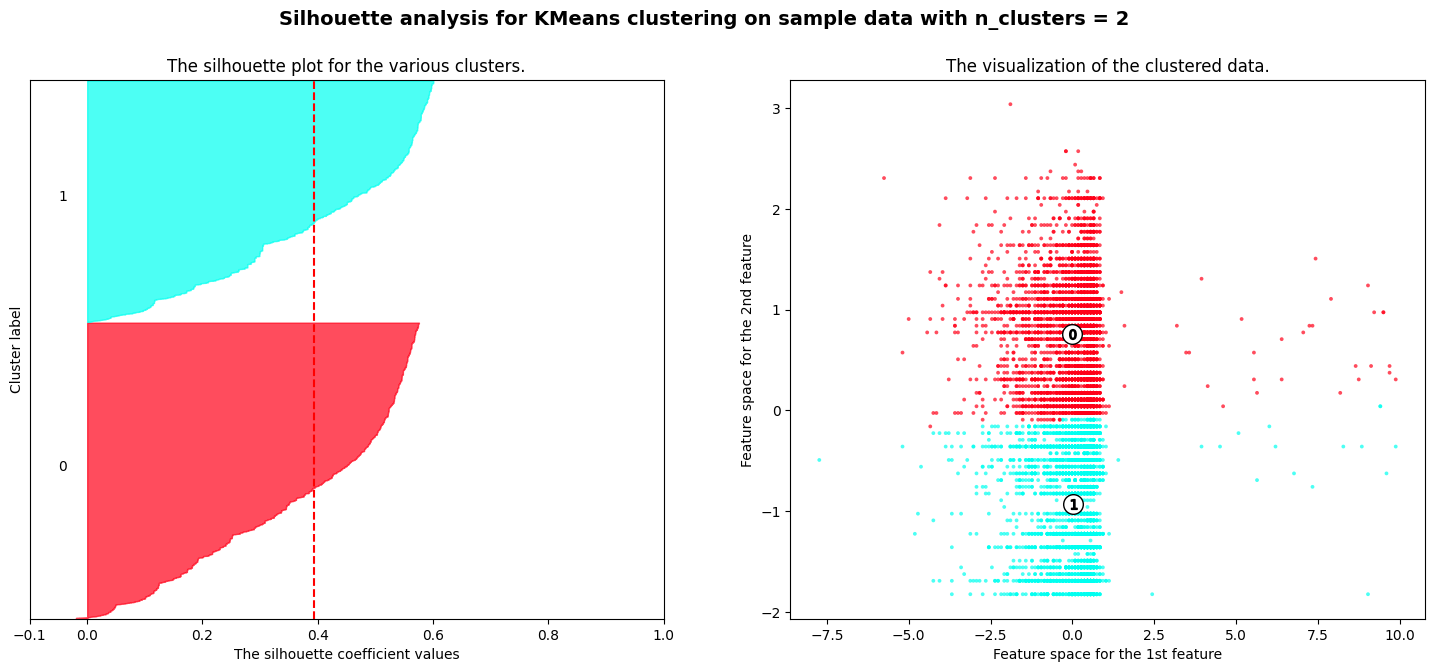

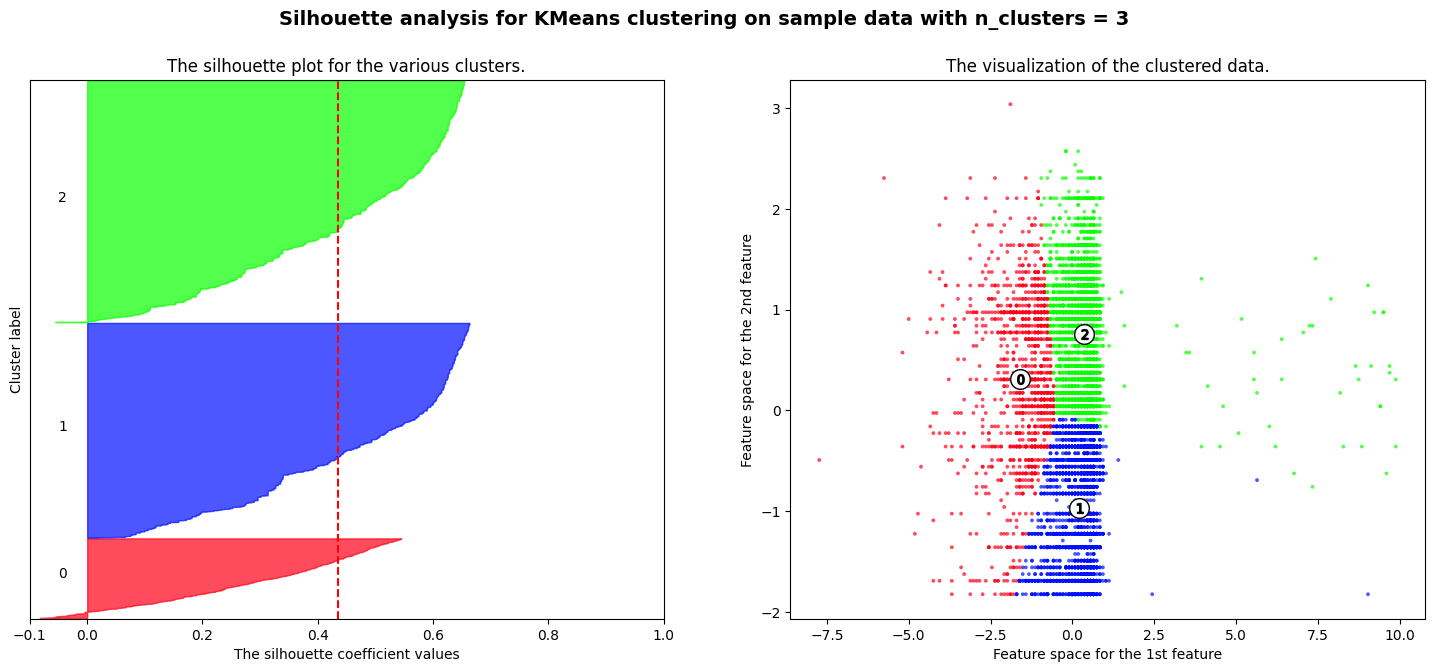

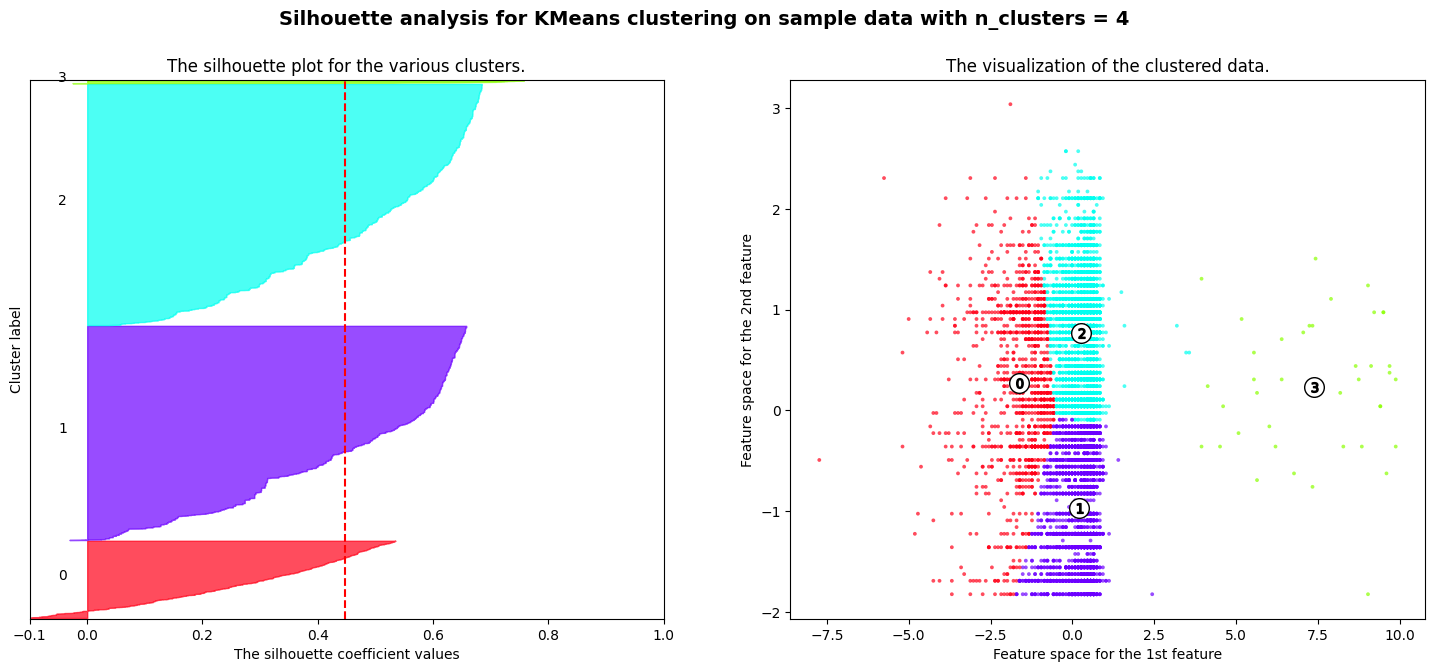

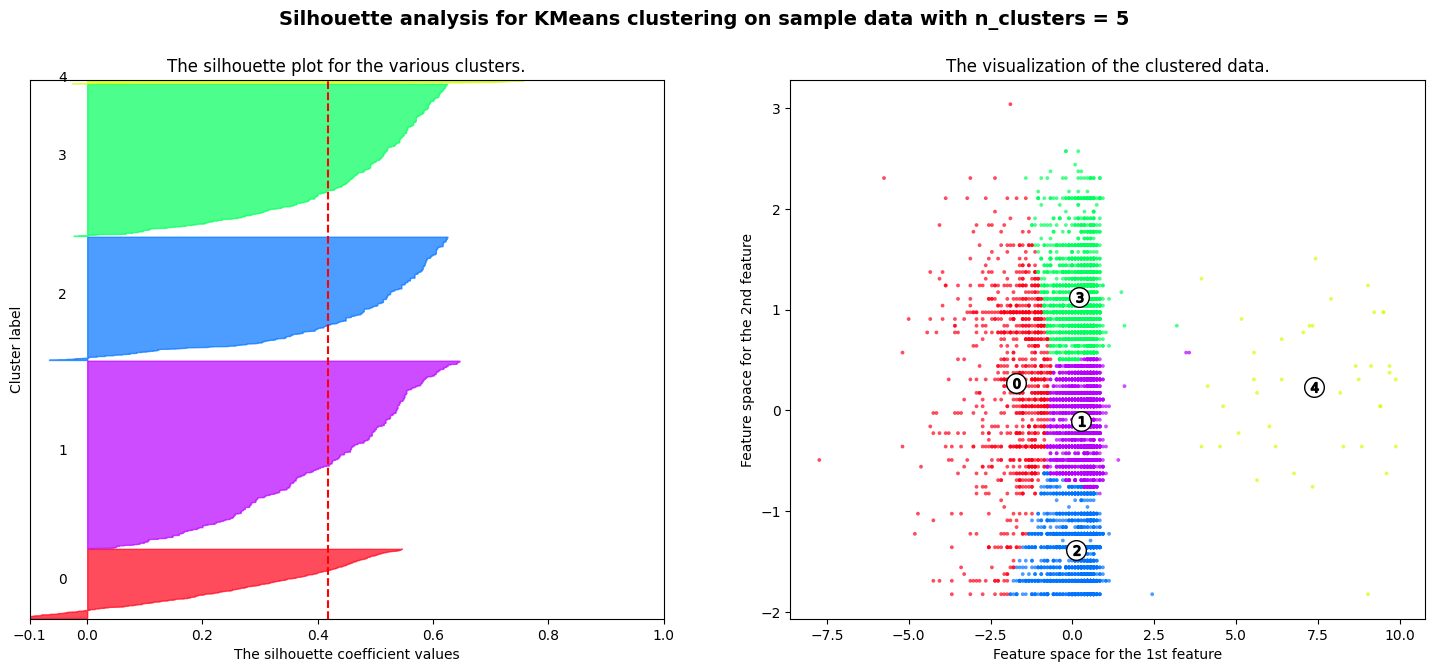

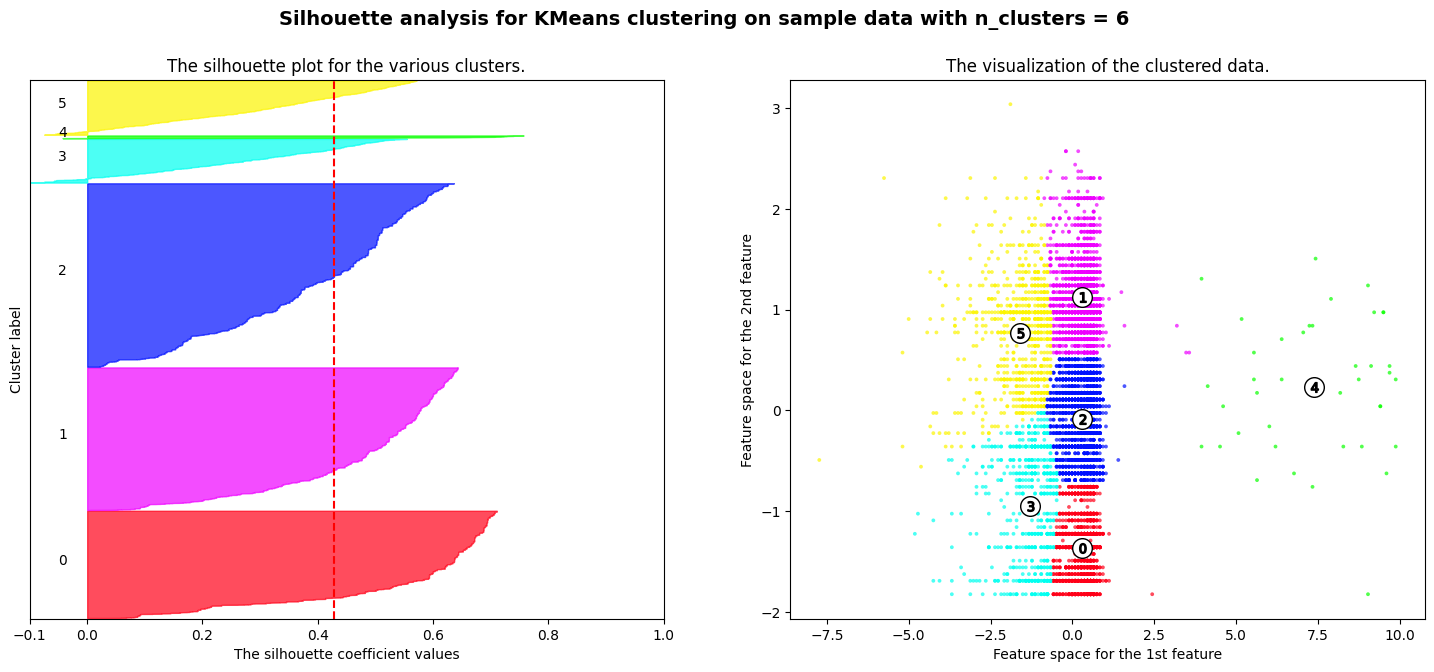

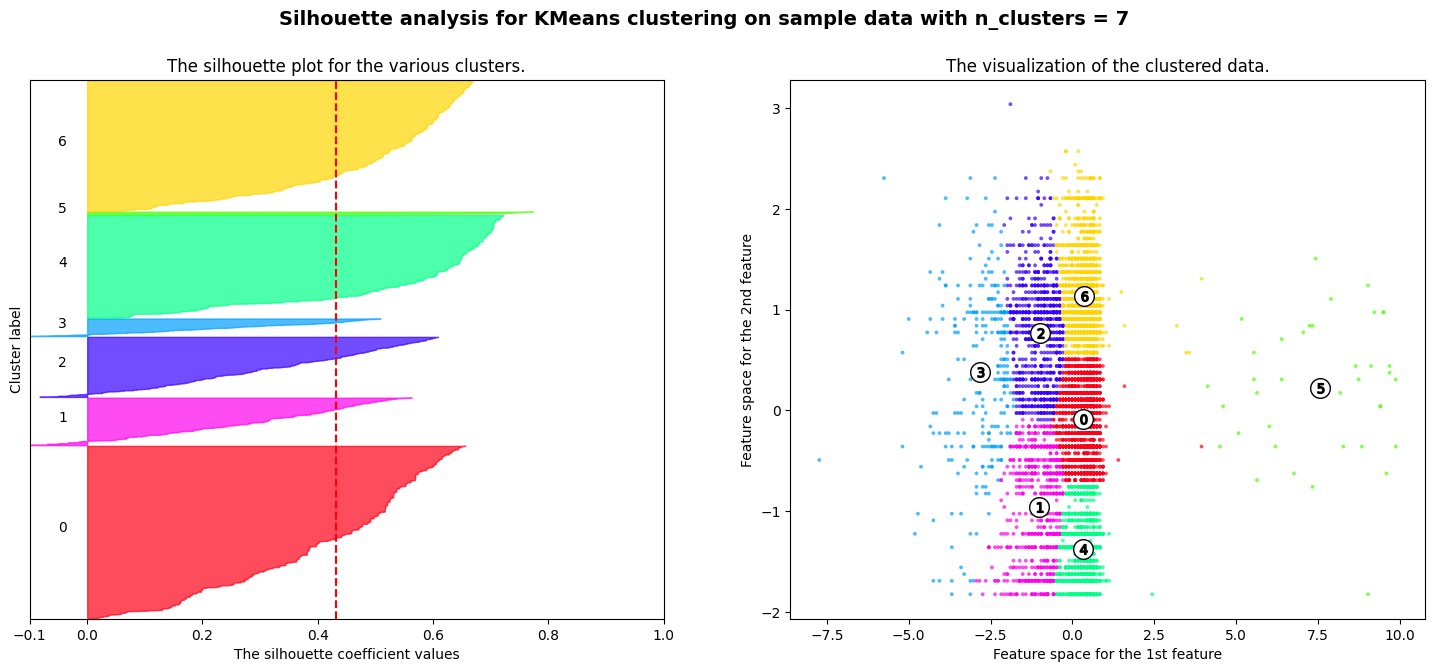

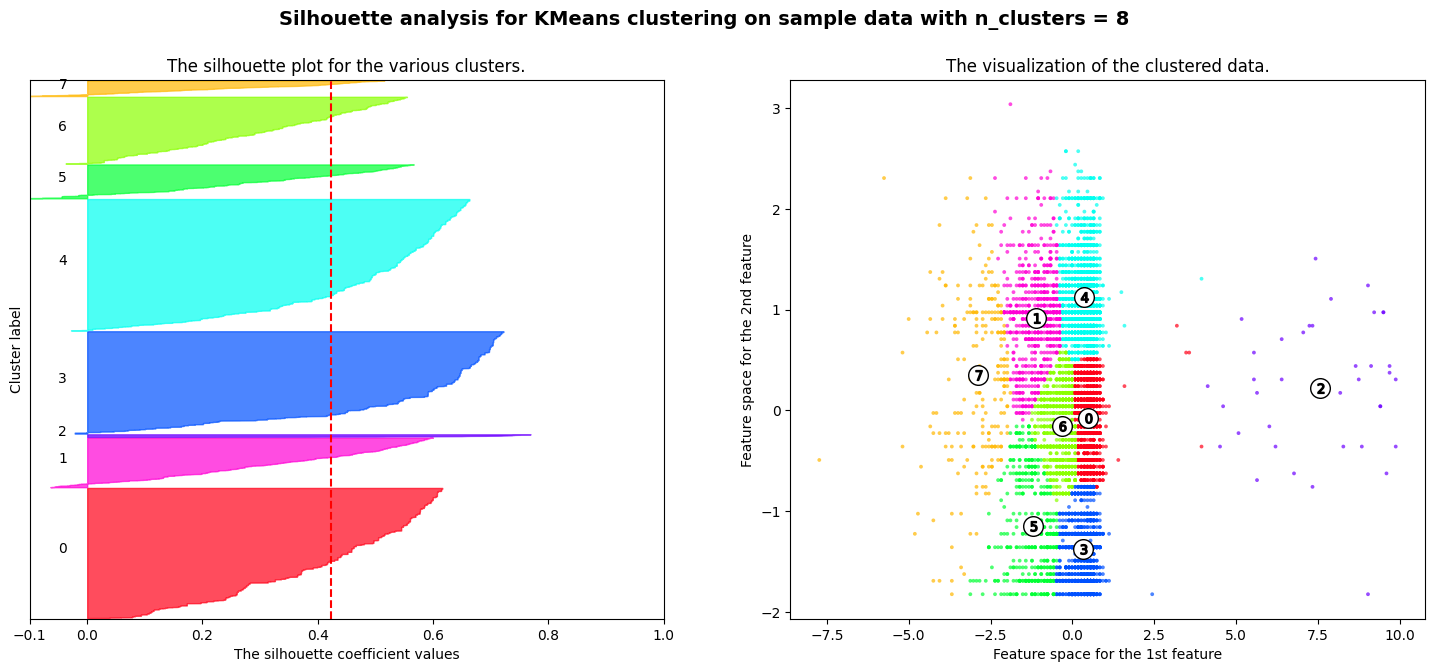

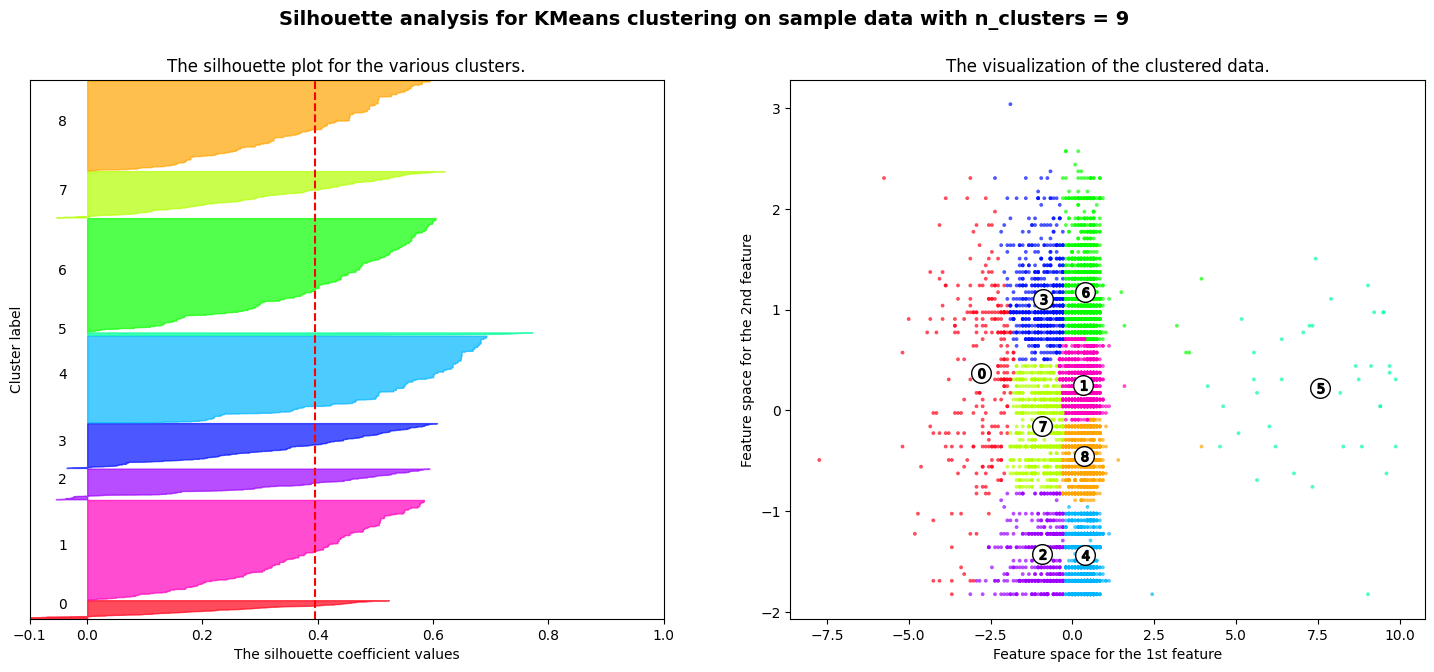

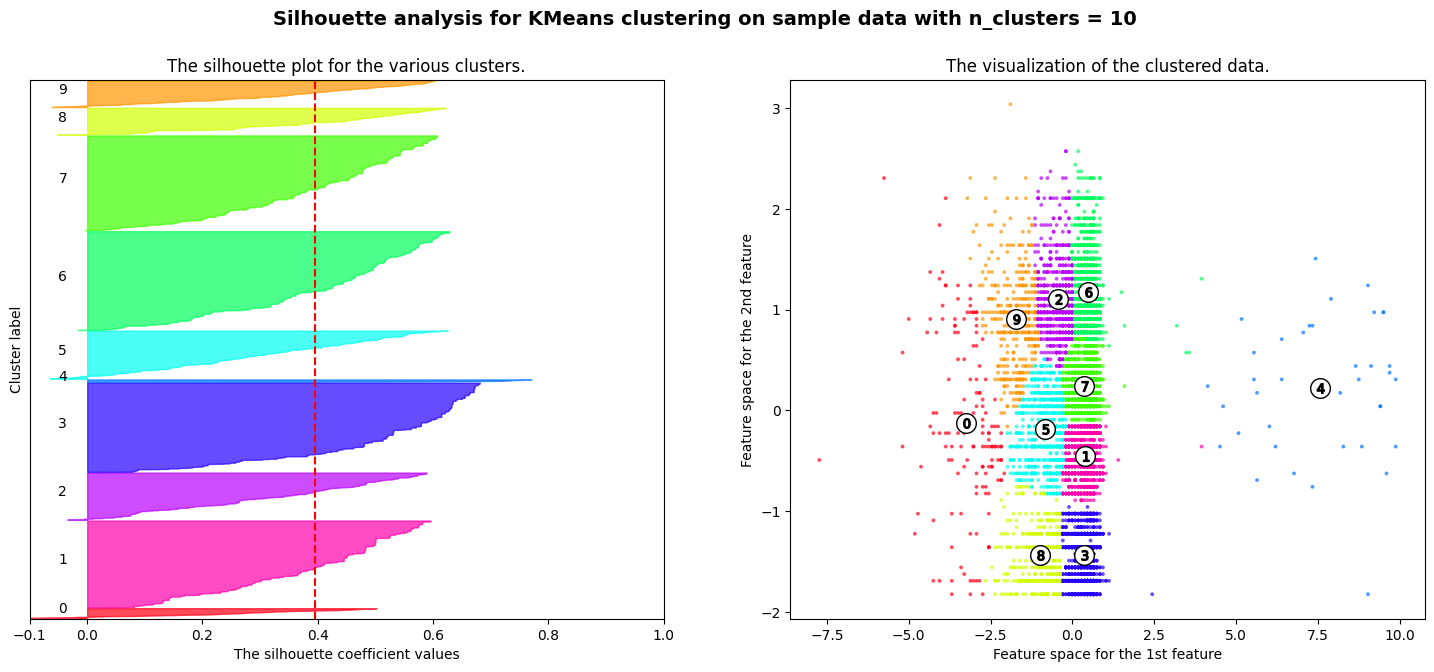

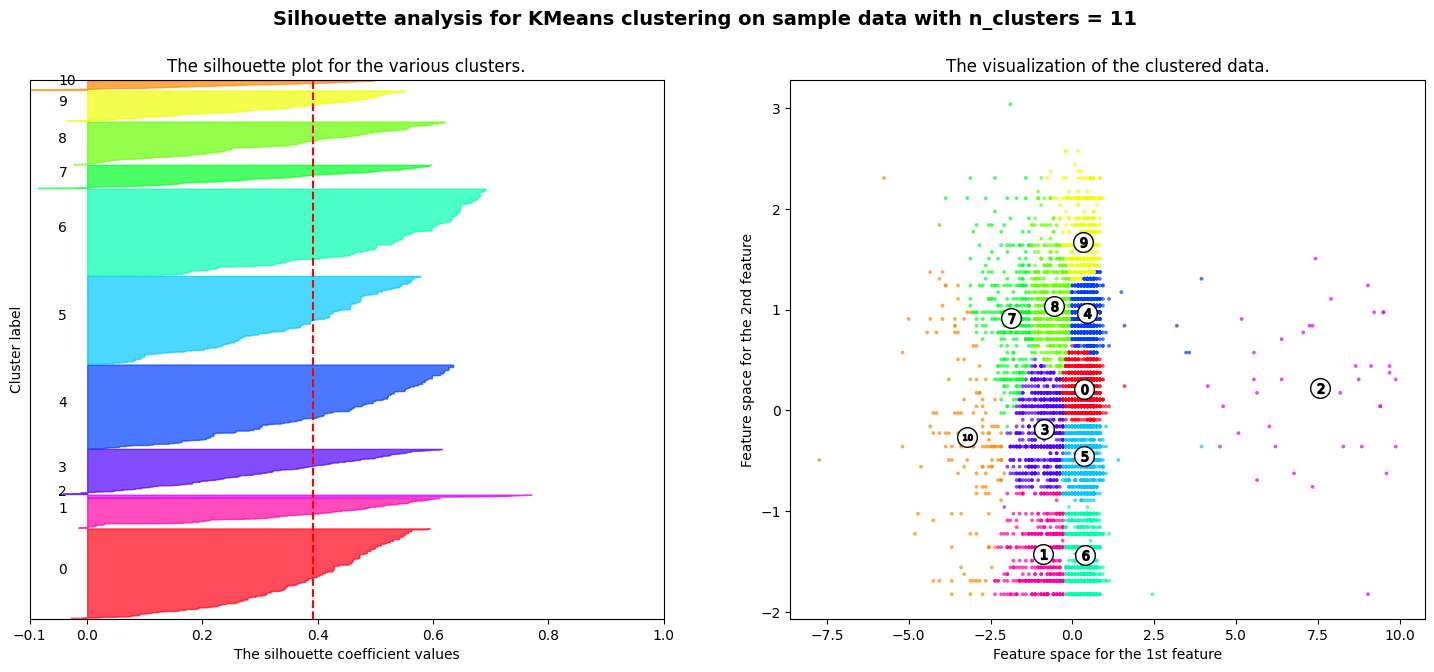

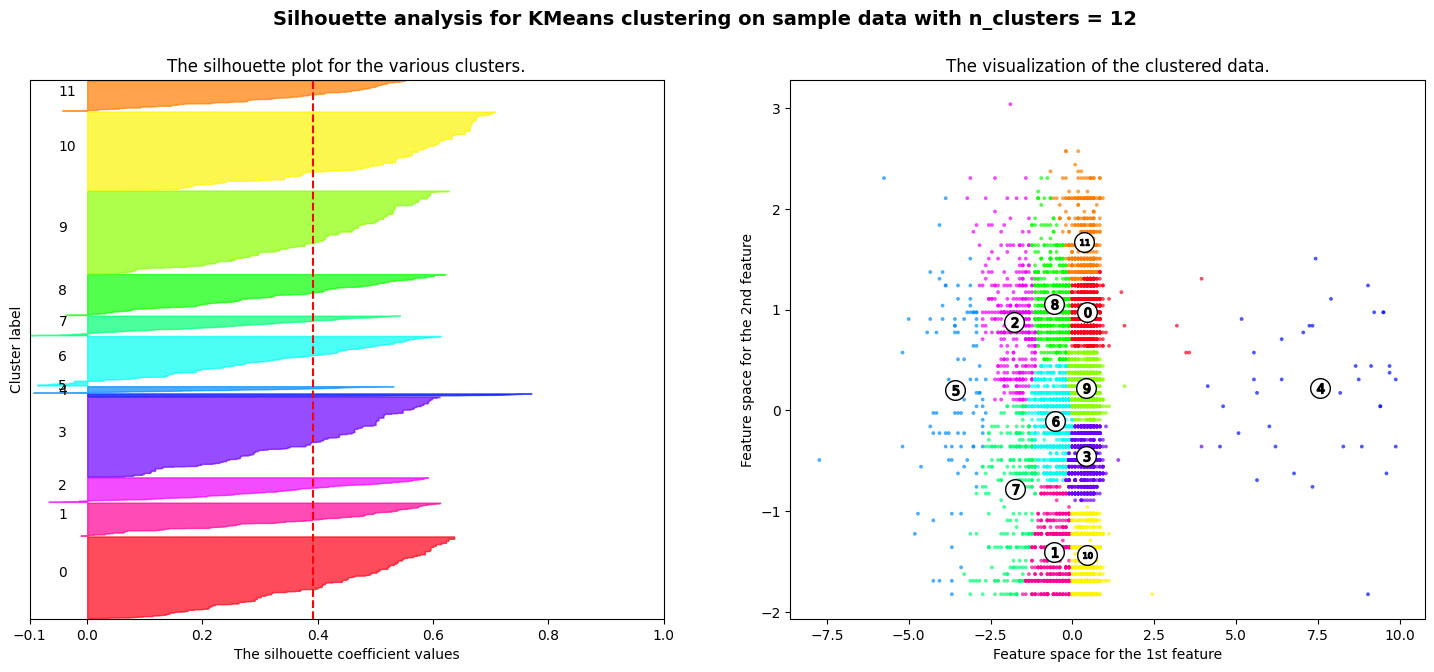

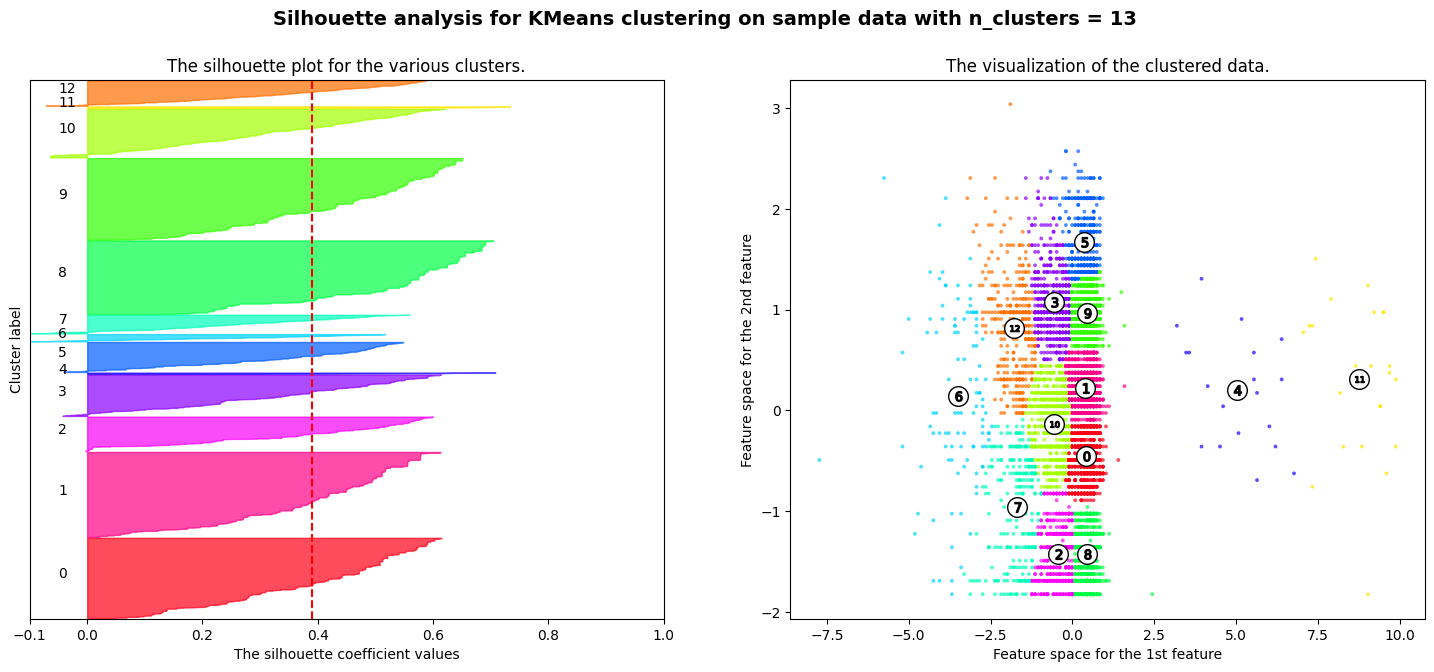

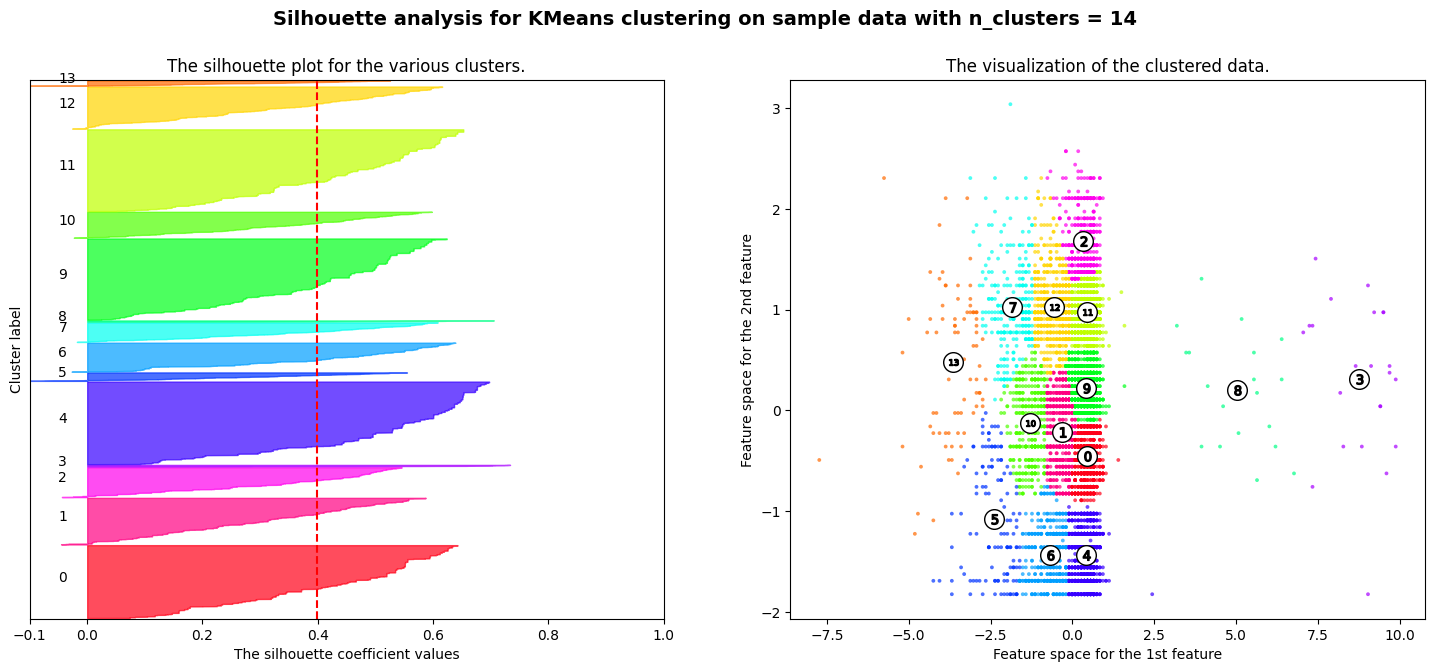

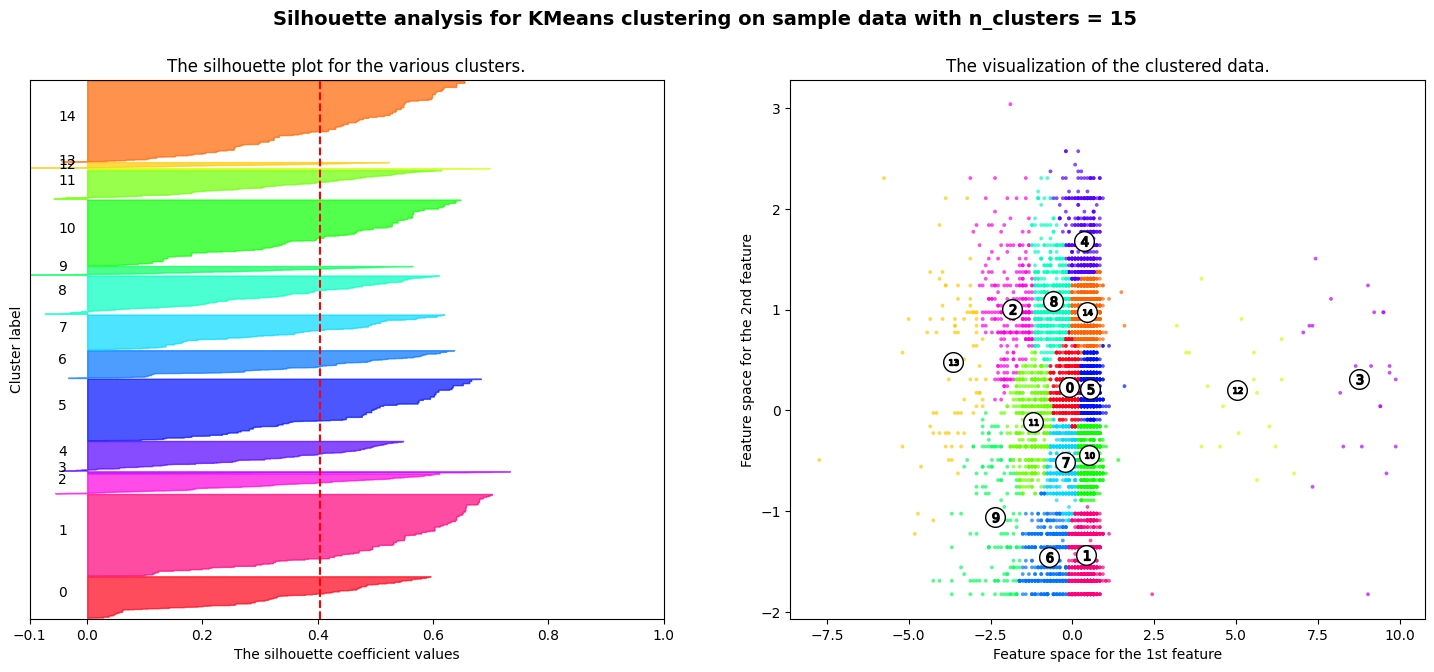

In [64]:
range_n_clusters = [i for i in range(2,16)]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.hsv_r(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    #ax1.set_facecolor("white")
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.grid(False)
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.hsv_r(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    ax2.grid(False)
    #ax2.set_facecolor("white")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# **Elbow Method**

---






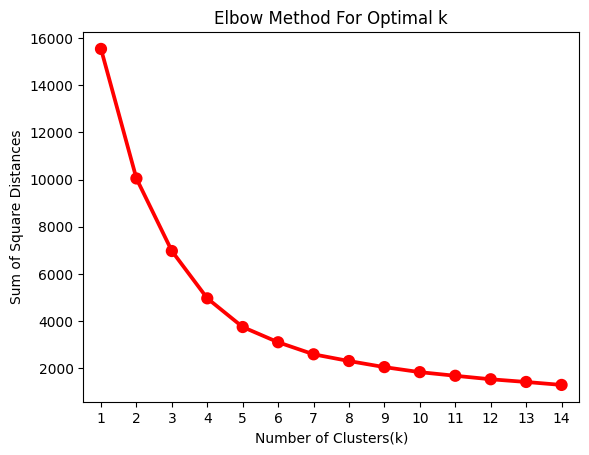

In [65]:
sum_of_square_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_square_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_square_dist.keys()), y = list(sum_of_square_dist.values()),color="red")
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

**The Elbow method is one of the most popular ways to find the optimal number of clusters. This method uses the concept of WCSS value. WCSS stands for Within Cluster Sum of Squares, which defines the total variations within a cluster.**

**We will use 5 clusters.We can see from the above graph that 6 is the elbow point**

In [66]:
kmeans = KMeans(n_clusters = 6 )
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

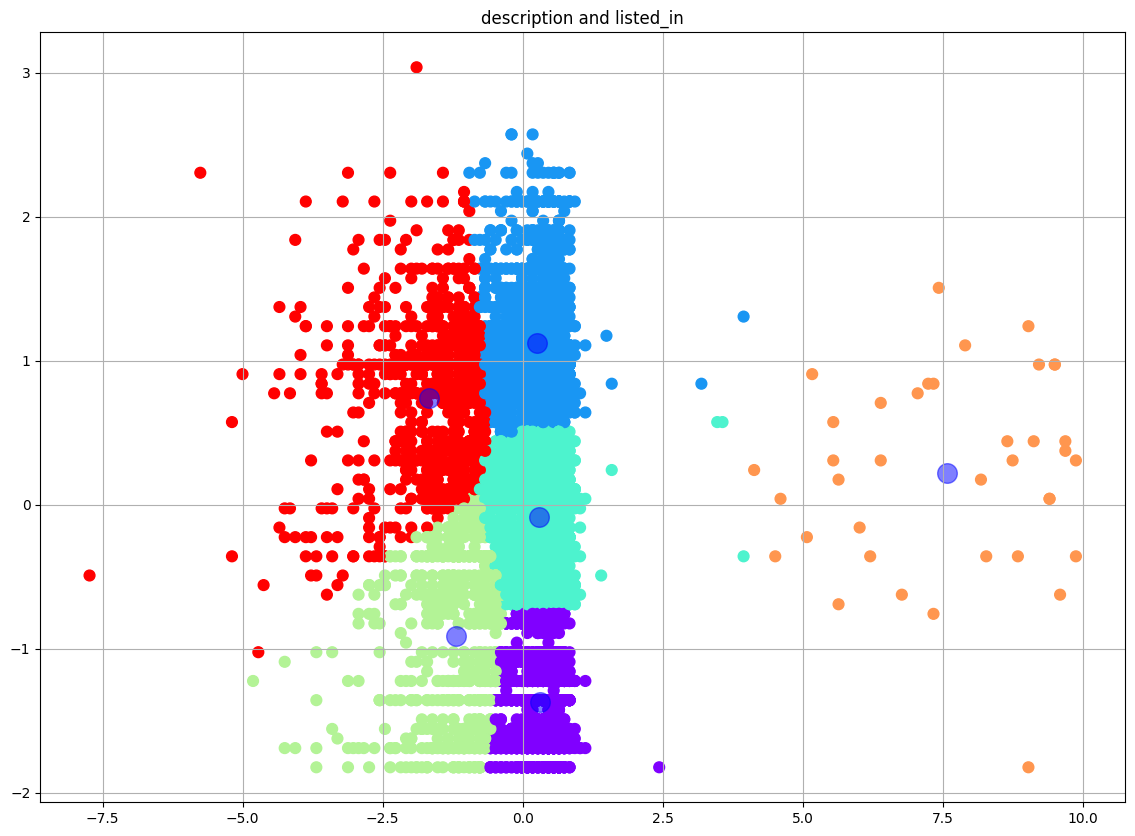

In [68]:
plt.figure(figsize=(14,10))
plt.title('description and listed_in')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=60, cmap='rainbow')
plt.grid(b=None)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.5)

# **DBSCAN**

---


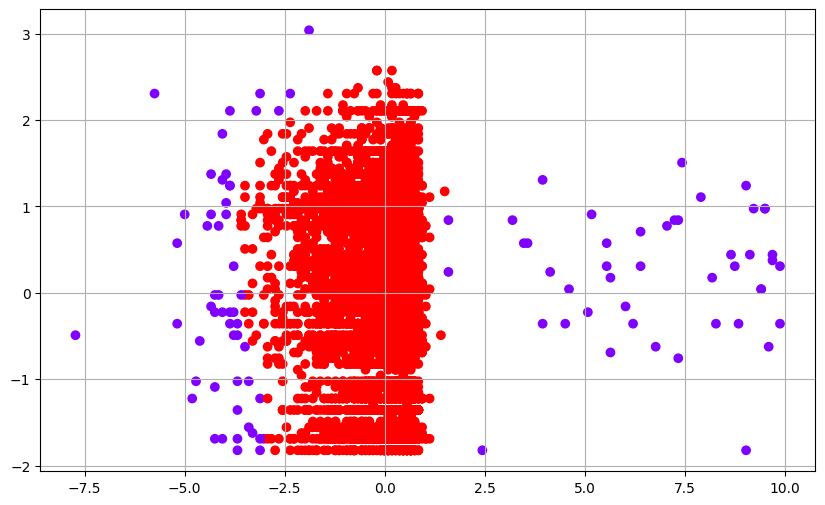

In [69]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=20).fit_predict(X)
plt.figure(figsize=(10,6))
plt.grid(b=None)
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='rainbow')

**DBSCAN - Density-Based Spatial Clustering of Applications with Noise. Finds core samples of high density and expands clusters from them. Good for data which contains clusters of similar density.**

# **3.HIERARCHICAL CLUSTERING**

---



---



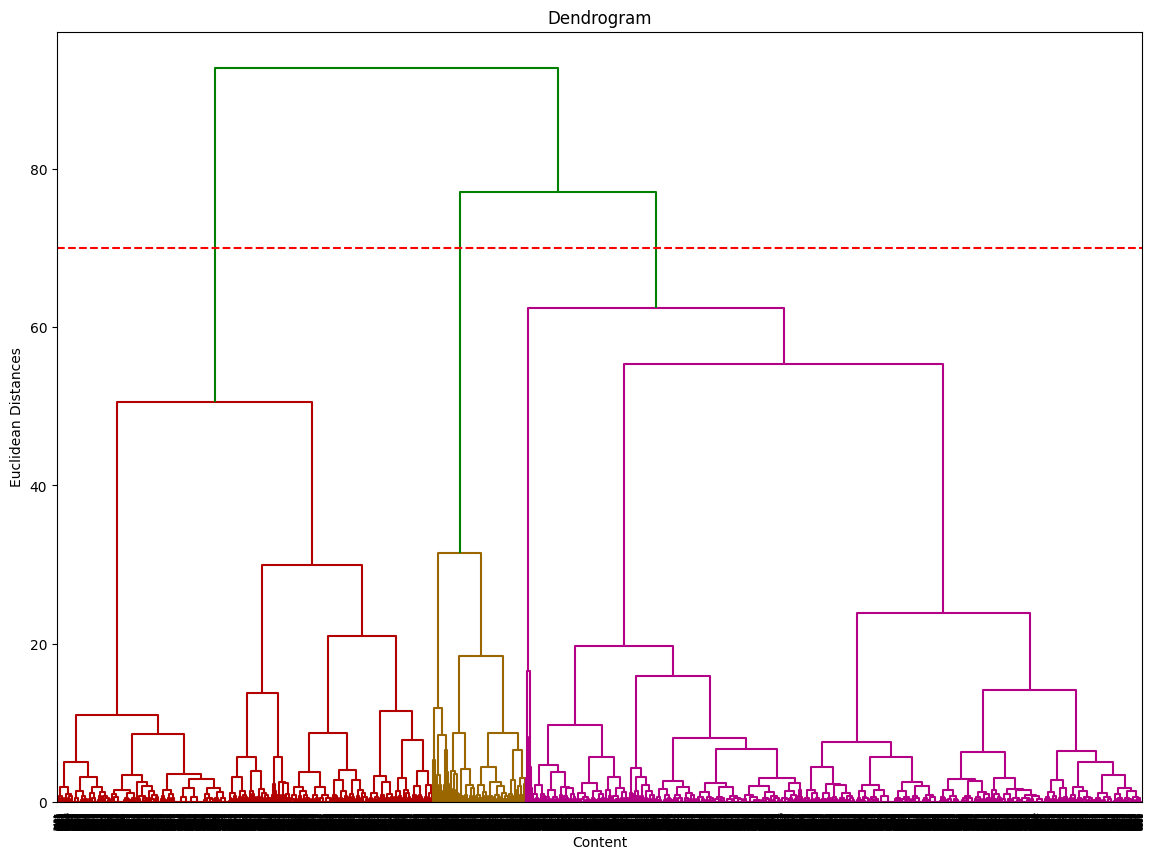

In [70]:
#  importing sch
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(14,10))
plt.style.use('default')
sch.set_link_color_palette(['#b30000','#996600', '#b30086'])
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'),above_threshold_color="green")
plt.axhline(y=70, color='r', linestyle='--')
 # find largest vertical distance we can make without crossing any other horizontal line
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Euclidean Distances')
plt.show()

**Hierarchical clustering is an unsupervised learning method for clustering data points. The algorithm builds clusters by measuring the dissimilarities between data. Unsupervised learning means that a model does not have to be trained, and we do not need a "target" variable. This method can be used on any data to visualize and interpret the relationship between individual data points.**

---



# **4.Agglomerative Clustering:**
Agglomerative Clustering is a type of hierarchical clustering algorithm. It is an unsupervised machine learning technique that divides the population into several clusters such that data points in the same cluster are more similar and data points in different clusters are dissimilar.

In [71]:
#import Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

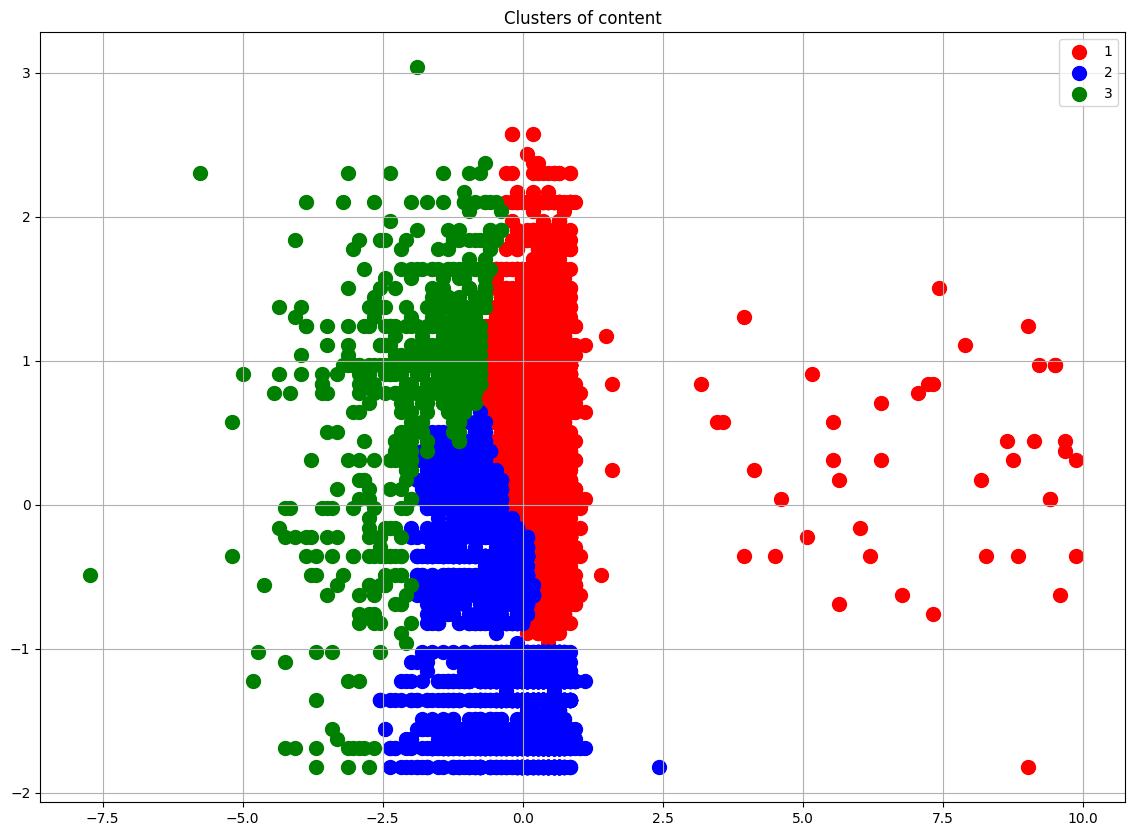

In [72]:
# Visualizing the clusters
plt.figure(figsize=(14,10))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = '1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = '2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = '3')
plt.grid(b=None)

plt.title('Clusters of content')

plt.legend()
plt.show()

In [86]:
# Run TF IDF Vectorizer on the text data
from sklearn.feature_extraction.text import TfidfVectorizer

# sublinear_df is set to True to use a logarithmic form for frequency
# min_df is the minimum numbers of documents a word must be present in to be kept
# norm is set to l2, to ensure all our feature vectors have a euclidian norm of 1
# ngram_range is set to (1, 2) to indicate that we want to consider both unigrams and bigrams
# stop_words is set to "english" to remove all common pronouns ("a", "the", ...) to reduce the number of noisy features

vectorizer = TfidfVectorizer(sublinear_tf= True, min_df=10, norm='l2', ngram_range=(1, 2), stop_words='english')
X_vc = vectorizer.fit_transform(NETFLIX_DF["listed_in"])

pd.DataFrame(X_vc.toarray(), columns=vectorizer.get_feature_names()).head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



action  action adventure  adventure  adventure anime  adventure children  \
0  0.00000           0.00000    0.00000              0.0                 0.0   
1  0.00000           0.00000    0.00000              0.0                 0.0   
2  0.00000           0.00000    0.00000              0.0                 0.0   
3  0.21135           0.21135    0.21135              0.0                 0.0   
4  0.00000           0.00000    0.00000              0.0                 0.0   

   adventure classic  adventure comedies  adventure dramas  adventure horror  \
0                0.0                 0.0               0.0               0.0   
1                0.0                 0.0               0.0               0.0   
2                0.0                 0.0               0.0               0.0   
3                0.0                 0.0               0.0               0.0   
4                0.0                 0.0               0.0               0.0   

   adventure independent  ...  tv dramas  tv horror  tv korean  tv mysteries  \
0               0.000000  ...   0.228523        0.0        0.0           0.0   
1               0.000000  ...   0.000000        0.0        0.0           0.0   
2               0.000000  ...   0.000000        0.0        0.0           0.0   
3               0.476294  ...   0.000000        0.0        0.0           0.0   
4               0.000000  ...   0.000000        0.0        0.0           0.0   

   tv romantic    tv sci  tv shows  tv spanish  tv thrillers  tv tv  
0          0.0  0.378081   0.17468         0.0           0.0    0.0  
1          0.0  0.000000   0.00000         0.0           0.0    0.0  
2          0.0  0.000000   0.00000         0.0           0.0    0.0  
3          0.0  0.000000   0.00000         0.0           0.0    0.0  
4          0.0  0.000000   0.00000         0.0           0.0    0.0  

[5 rows x 164 columns]

In [91]:
#Function for getting the most common words in each cluster
def get_common_words_cluster(vc_arr, y_pred, n_feats):
    labels = np.unique(y_pred)
    dfs = []
    for label in labels:
      # indices for each cluster
      id_temp = np.where(y_pred==label)
      # returns average score across cluster 
      x_means = np.mean(vc_arr[id_temp], axis = 0) 
      # indices with top 20 scores
      sorted_means = np.argsort(x_means)[::-1][:n_feats] 
      features = vectorizer.get_feature_names()
      common_words = [(features[i], x_means[i]) for i in sorted_means]
      df = pd.DataFrame(common_words, columns = ['words', 'count'])
      dfs.append(df)
    return dfs

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



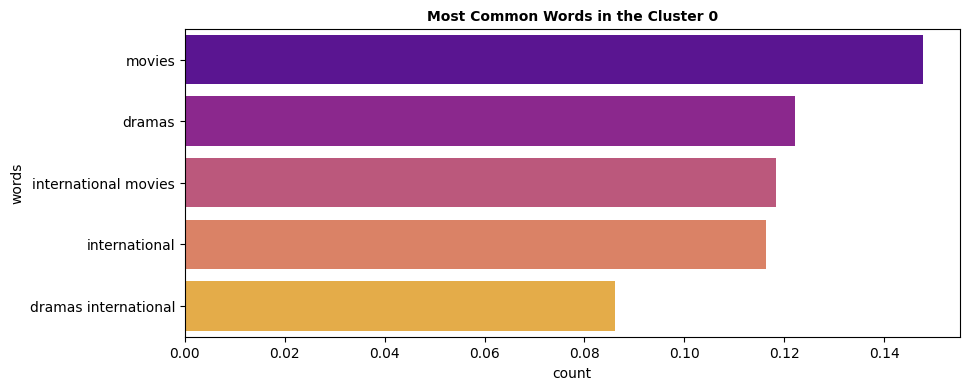

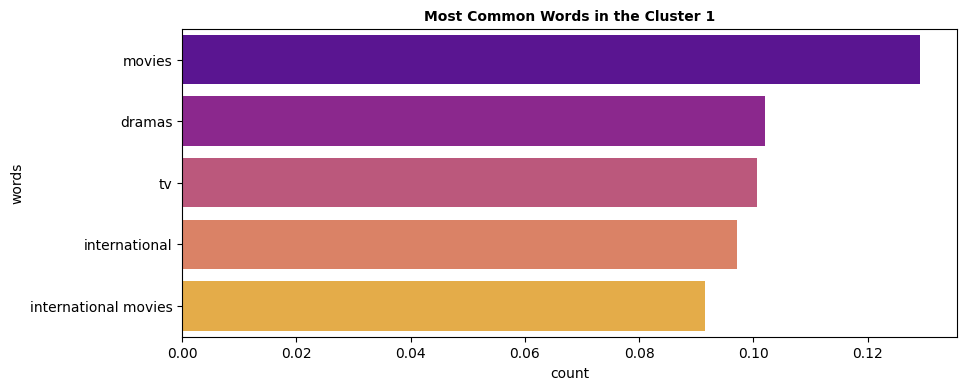

In [90]:
#Function for data visualization of the most commin words in each cluster
def plot_common_words(dfs, num):
    for i in range(0, len(dfs)):
        plt.figure(figsize=(10, 4))
        plt.title(("Most Common Words in the Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'count' , y = 'words', orient = 'h' , data = dfs[i][:num],palette = 'plasma')
dfs = get_common_words_cluster(X_vc.toarray(), y_pred, 5)
plot_common_words(dfs, 5)

In [92]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]

terms = vectorizer.get_feature_names()
for i in range(k_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :k_clusters]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Cluster 0: action adventure action
Cluster 1: action action adventure
Cluster 2: action action adventure
Cluster 3: action action adventure
Cluster 4: action adventure action
Cluster 5: action adventure action
Cluster 6: action action adventure
Cluster 7: action action adventure
Cluster 8: action action adventure
Cluster 9: action adventure action
Cluster 10: action adventure action
Cluster 11: action action adventure
Cluster 12: action adventure action
Cluster 13: action action adventure
Cluster 14: action adventure action
Cluster 15: action adventure action
Cluster 16: action adventure action
Cluster 17: action adventure action
Cluster 18: action adventure action
Cluster 19: action action adventure
Cluster 20: action adventure action
Cluster 21: action adventure action
Cluster 22: action adventure action
Cluster 23: action adventure action
Cluster 24: action adventure action
Cluster 25: action adventure action
Cluster 26: action action adventure
Cluster 27: action action adventure
Cl

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [93]:
NETFLIX_DF['cluster'] = kmeans.labels_
NETFLIX_DF.head()

show_id     type  title                           director  \
0      s1  TV Show     3%              N o   D i r e c t o r   
1      s2    Movie   7:19  J o r g e   M i c h e l   G r a u   
2      s3    Movie  23:59            G i l b e r t   C h a n   
3      s4    Movie      9              S h a n e   A c k e r   
4      s5    Movie     21        R o b e r t   L u k e t i c   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating  duration  ...  \
0 2020-08-14          2020  TV-MA         4  ...   
1 2016-12-23          2016  TV-MA        93  ...   
2 2018-12-20          2011      R        78  ...   
3 2017-11-16          2009  PG-13        80  ...   
4 2020-01-01          2008  PG-13       123  ...   

                                         description day_added  year_added  \
0  In a future where the elite inhabit an island ...        14        2020   
1  After a devastating earthquake hits Mexico Cit...        23        2016   
2  When an army recruit is found dead, his fellow...        20        2018   
3  In a postapocalyptic world, rag-doll robots hi...        16        2017   
4  A brilliant group of students become card-coun...         1        2020   

   month_added  country_single     country_list Length(listed_in)  \
0            8          Brazil         [Brazil]                54   
1           12          Mexico         [Mexico]                28   
2           12       Singapore      [Singapore]                35   
3           11   United States  [United States]                56   
4            1   United States  [United States]                 6   

   Length(description)  Cluster Label  cluster  
0                  136             10        1  
1                  148              1        2  
2                  149              8        2  
3                  145             37        1  
4                  143             32        0  

[5 rows x 21 columns]

In [95]:
#Function for getting the some of the same cluster item details
def find_same_cluster_items(name_nf):
  inp_nf = NETFLIX_DF.loc[NETFLIX_DF['title'].str.lower() == name_nf.lower()]
  num = inp_nf.cluster.iloc[0]
  type_nf = inp_nf.type.iloc[0]
  temp_df = NETFLIX_DF.loc[(NETFLIX_DF['cluster'] == num) & (NETFLIX_DF['type']==type_nf)]
  temp_df = temp_df.sample(10)
  print("The cluster number is {}".format(num))
   #print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))
  return list(temp_df['title'])

In [96]:
find_same_cluster_items('zodiac')

The cluster number is 2


['Falz Experience',
 "Can't Help Falling in Love",
 'Instructions Not Included',
 "Sarah's Key",
 'The Bygone',
 'Mythily Veendum Varunnu',
 'Uriyadi 2',
 'Welcome 2 Karachi',
 'Anesthesia',
 'Suicide (Hitabdut)']

In [97]:
find_same_cluster_items('Dear Zindagi')

The cluster number is 2


['Isa Pa with Feelings',
 'The Day of the Lord',
 'Elles ont toutes une histoire',
 'Ek Ladki Ko Dekha Toh Aisa Laga',
 'The Midas Touch',
 'Ugly',
 '48 Christmas Wishes',
 'Antar: Son of Shadad',
 'The Lord of the Rings: The Two Towers',
 'Haseena Maan Jaayegi']

# **Recommendation System**

---



---



In [98]:
from sklearn.metrics.pairwise import linear_kernel

#compute the cosine similarity matrix 
cosine_sim= linear_kernel(X_vc,X_vc)

In [101]:
#Series for getting the index and title
indices = pd.Series(NETFLIX_DF.index,index=NETFLIX_DF['title']).drop_duplicates()

In [103]:
def get_recommendations(title, cosine_sim = cosine_sim):

    #get index of the matching title
    idx=indices[title]

    #get the similarity score of the similar titles
    sim_scores=list(enumerate(cosine_sim[idx]))

    #sort the movies based on the similarity score
    sim_scores=sorted(sim_scores, key=lambda x:x[1], reverse=True)

    #get the similarity score of top 10 movies
    sim_scores=sim_scores[1:11]

    #get the indices 
    movie_indices = [i[0] for i in sim_scores]
    
    #return the top indices
    return NETFLIX_DF['title'].iloc[movie_indices]

In [106]:
get_recommendations('Dear Zindagi')

40                     Çarsi Pazar
42     Çok Filim Hareketler Bunlar
77                2 Alone in Paris
102            3 Türken & ein Baby
103              30 Days of Luxury
119               5 Star Christmas
124                          5Gang
187             A Home with A View
204      A Mission in an Old Movie
219              A Remarkable Tale
Name: title, dtype: object

# **CONCLUSION**

---



---






1.Netflix has 69% of its content as movies, so we can say that movies are clearly more popular on Netflix than TV shows.Netflix has more movies than TV Shows

2.United States provides the most number of movies and shows followed by India and United Kingdom.

3.TV-MA rated content is maximum in number in the dataset. This rating indicates that the content is for mature and adult audience above the age of 17.

4.There is an exponential raise in the number of TV shows and movies distributed by Netflix in the recent years.

5.Text cleaning and vectorization was done on the combined features of the dataset which includes origin country, leading cast member, rating type, content type and description for clustering analysis.

6.Optimal number of clusters were found out to be 15 with silhouette coefficient value of 0.040


7.Clusters are identified for each of the record in the dataset.

8.Recommendation based on cosine similiarity is also done on the same transformed data.